In [1]:
## Import requisite libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
## Read the csv file
df = pd.read_csv('C:\\Users\\i43249\\Downloads\\train.csv')

## View the top  rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Check the dimensions
df.shape

(1460, 81)

In [7]:
## Preventing 'NA' to be read as 'NaN' by pandas
df = pd.read_csv('C:\\Users\\i43249\\Downloads\\train.csv', keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [8]:
## Replacing all 'NA' of all above mentioned columns by 'None'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [10]:
## Check the info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [12]:
## Convert three columns to 'object' type as mentioned above

df['MSSubClass']= df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [13]:
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [14]:
## Check whether the data types of five columns have changed
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [15]:
## View the statistical description of the numerical columns
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Univariate Analysis


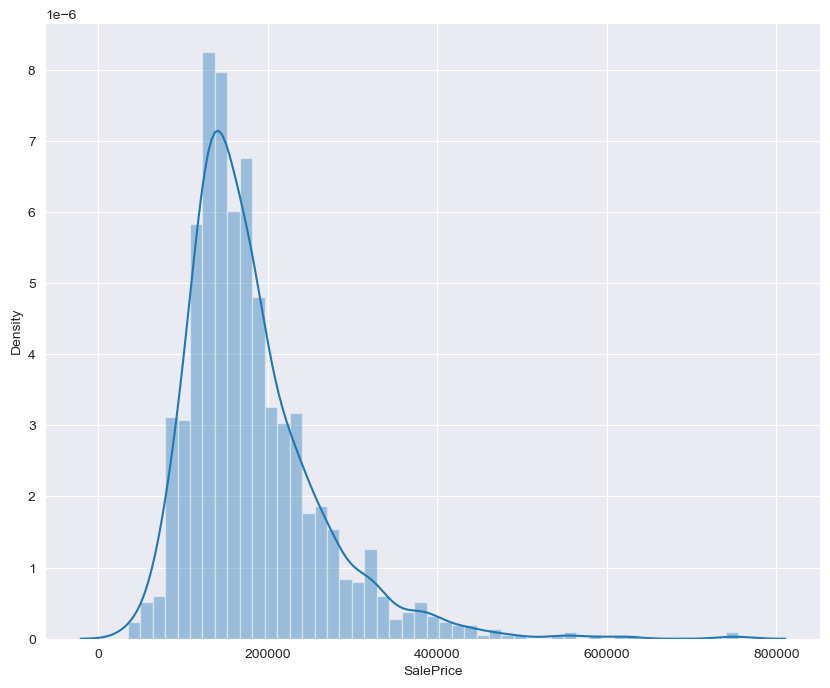

In [16]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [17]:
## Check the skewness of target variable
df['SalePrice'].skew()

1.8828757597682129

In [18]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()

6.536281860064529

In [19]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [20]:
## Check the skewness of target variable again
df['SalePrice'].skew()

0.12133506220520406

In [21]:
## Check the kurtosis of target variable again
df['SalePrice'].kurt()

0.8095319958036296

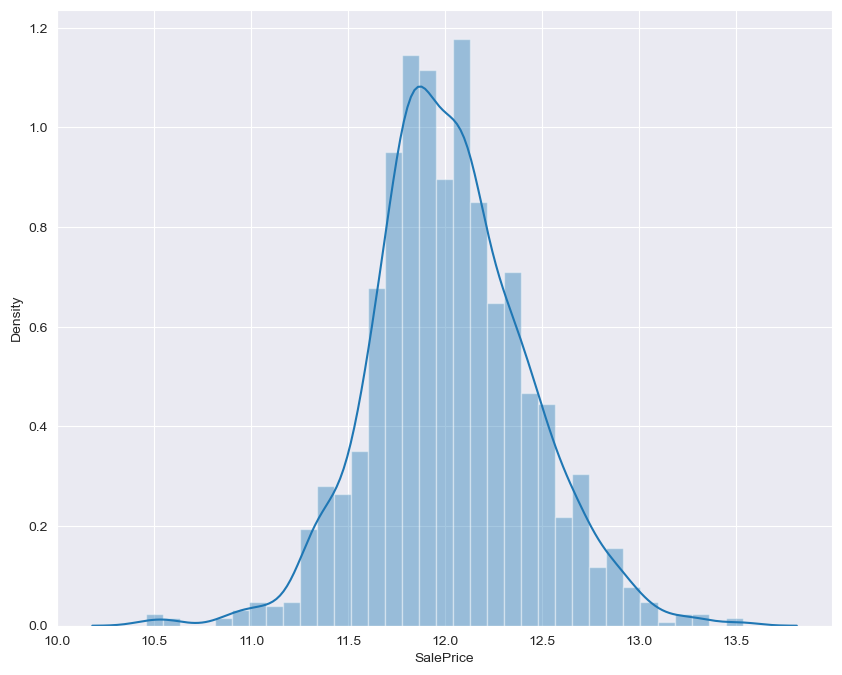

In [22]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

In [23]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


In [24]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


## EDA on Numerical Columns

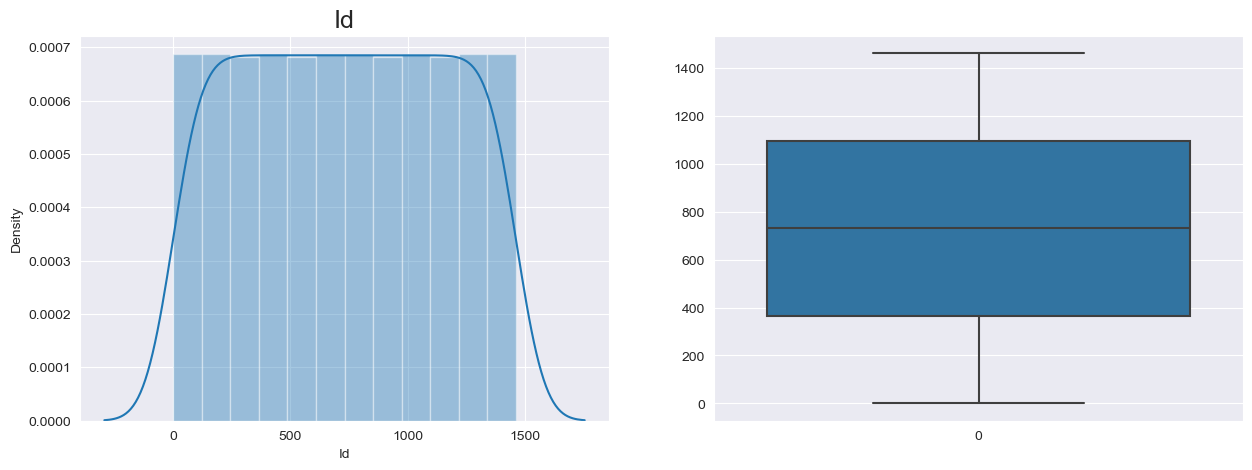

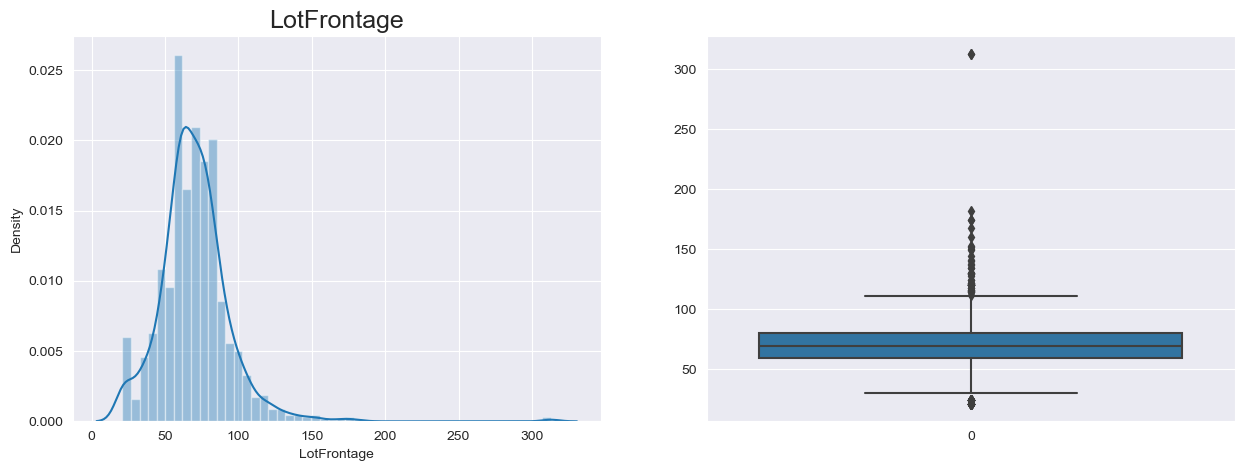

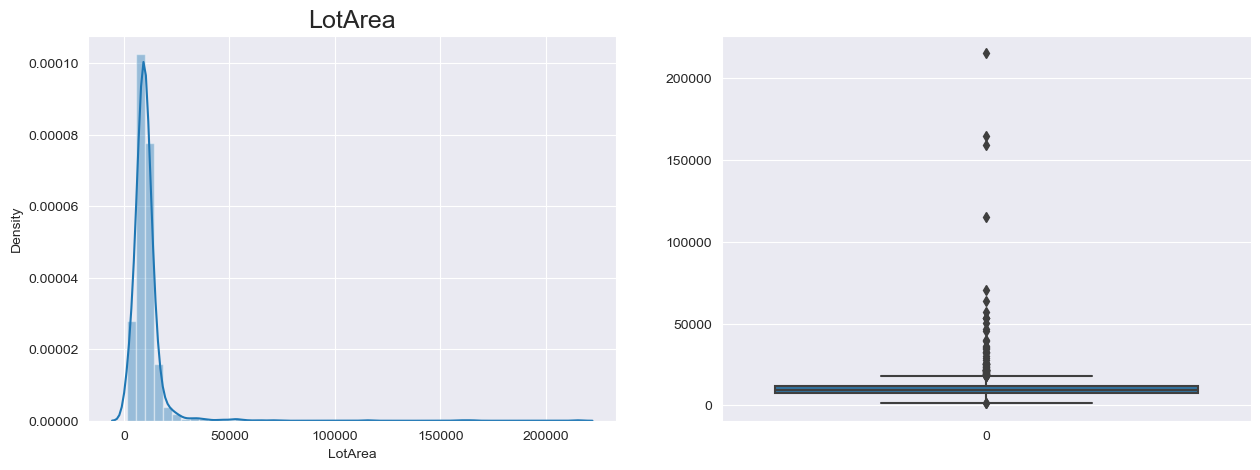

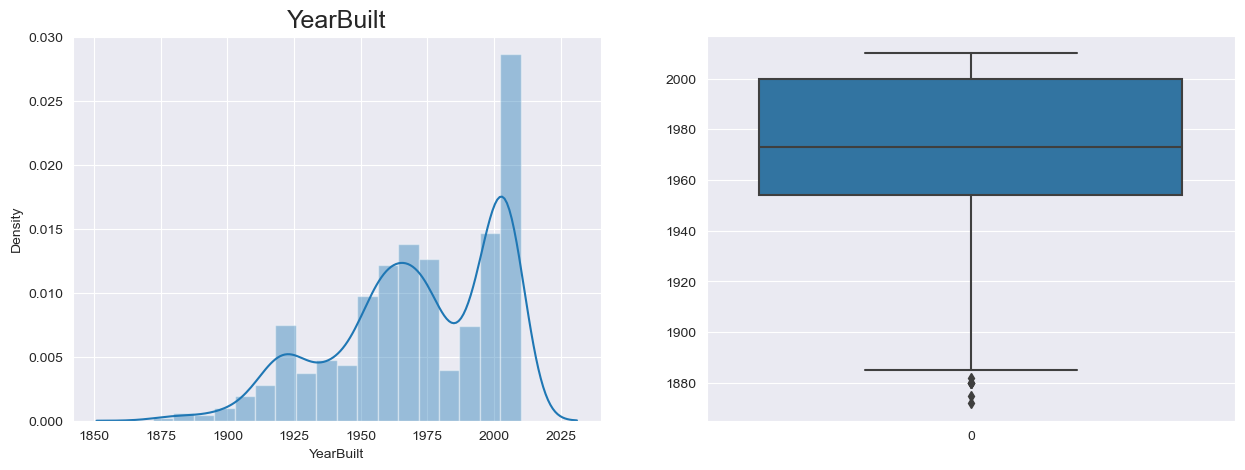

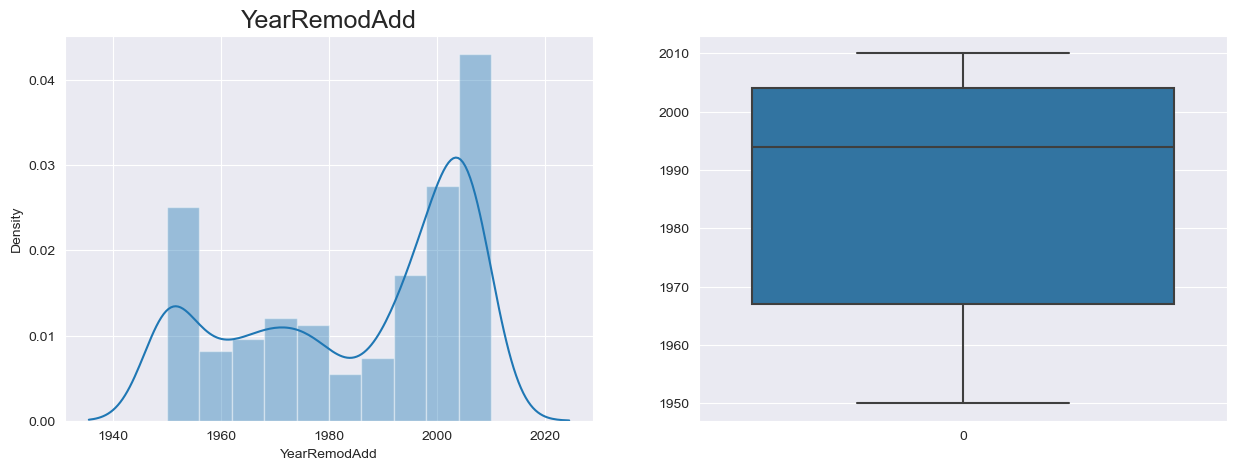

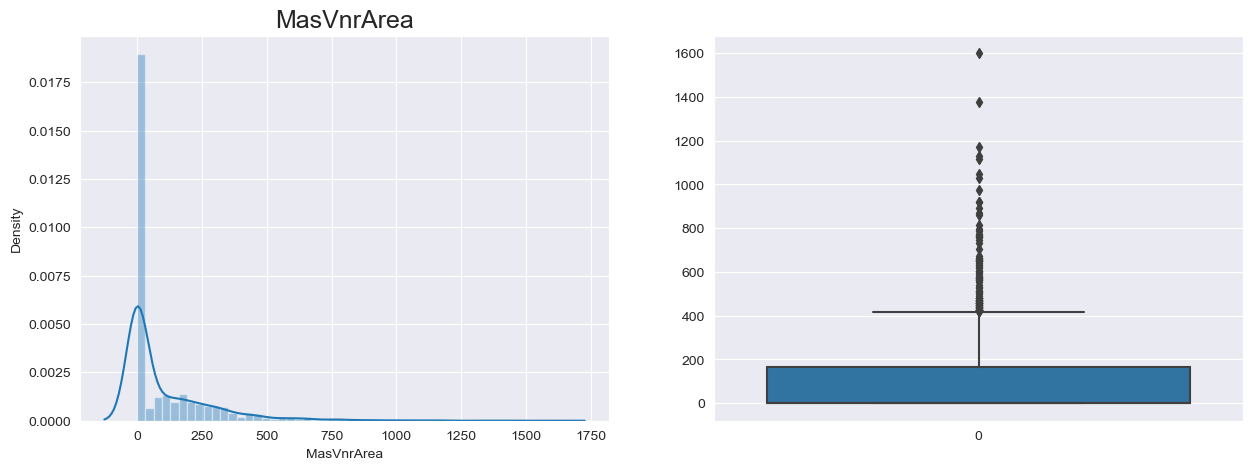

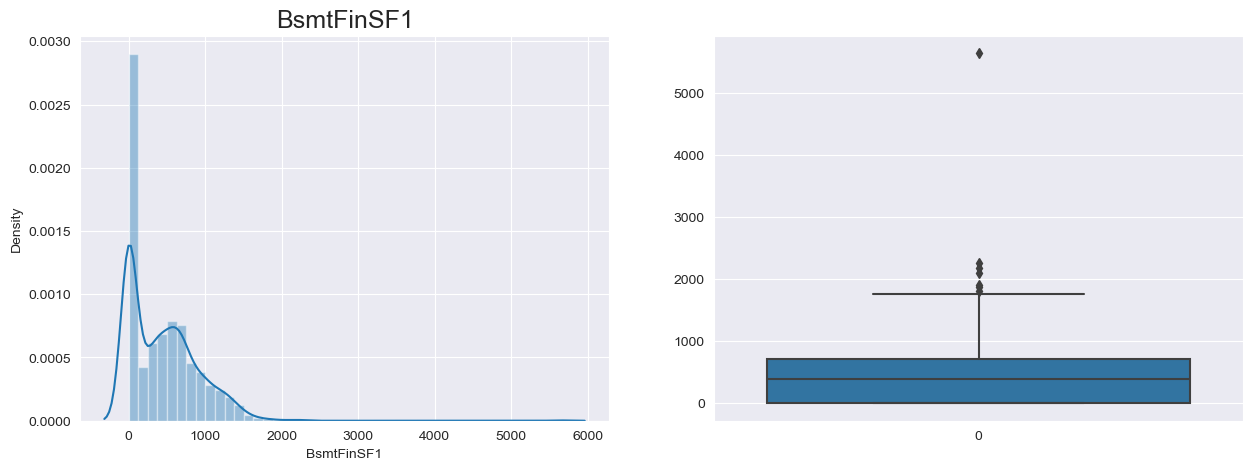

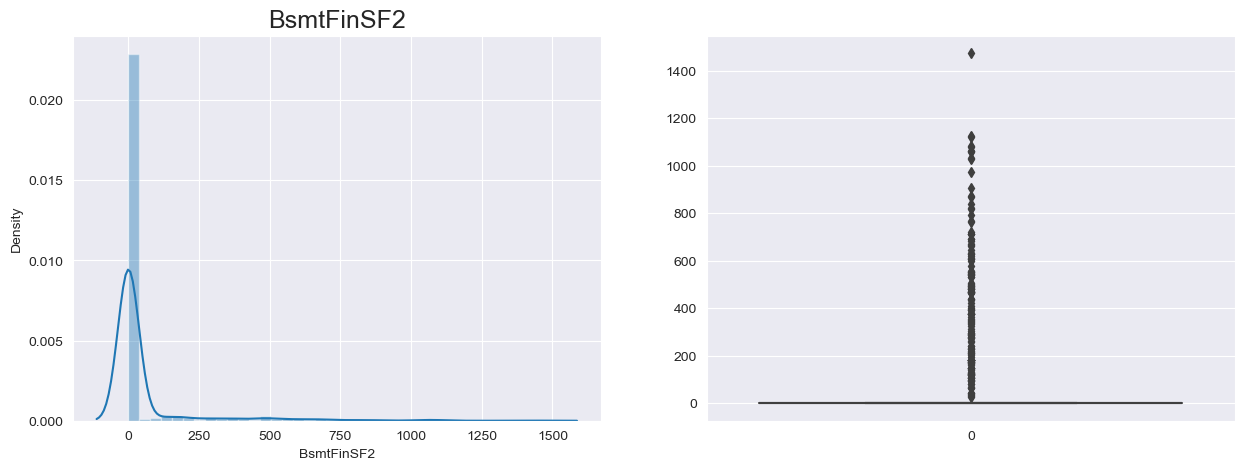

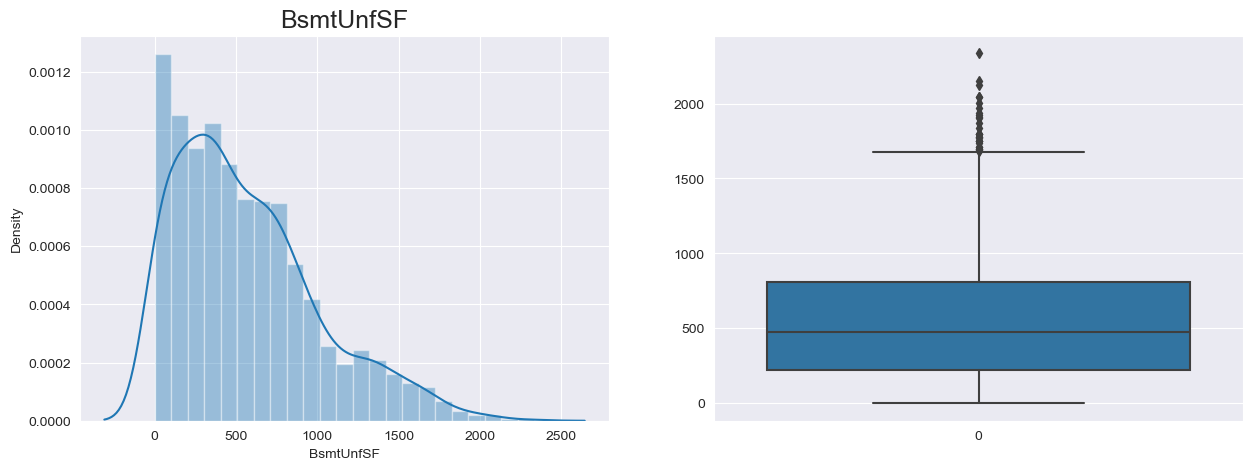

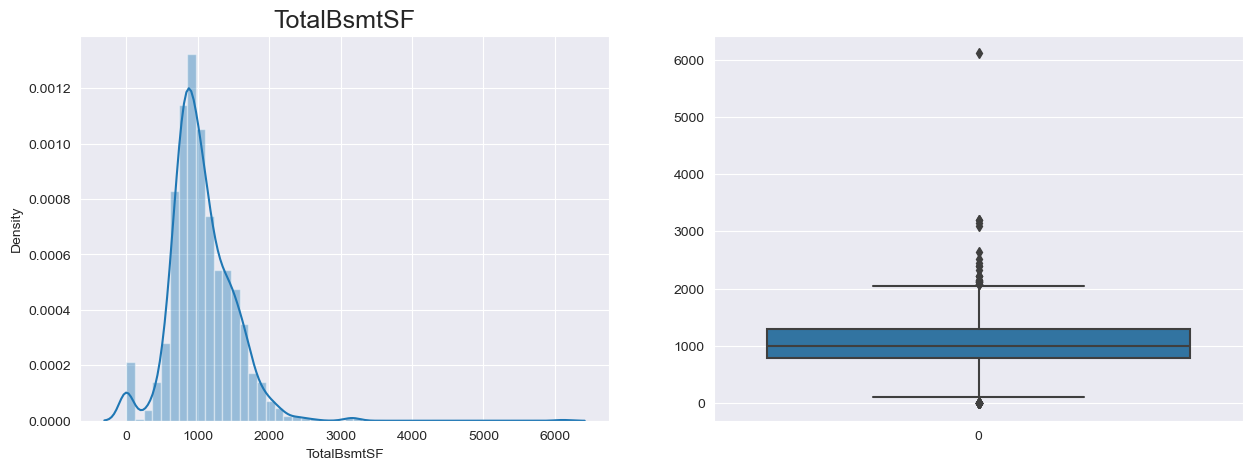

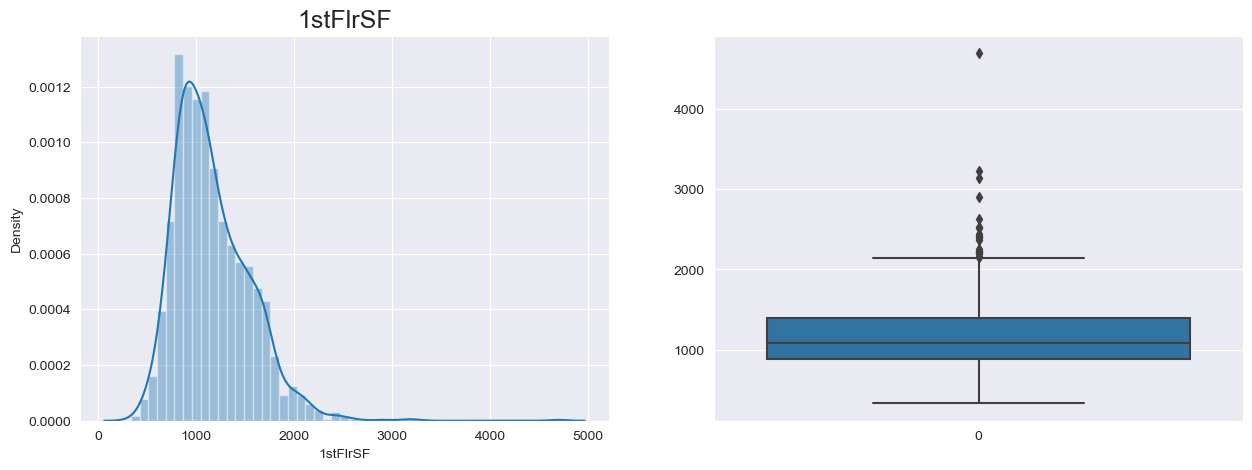

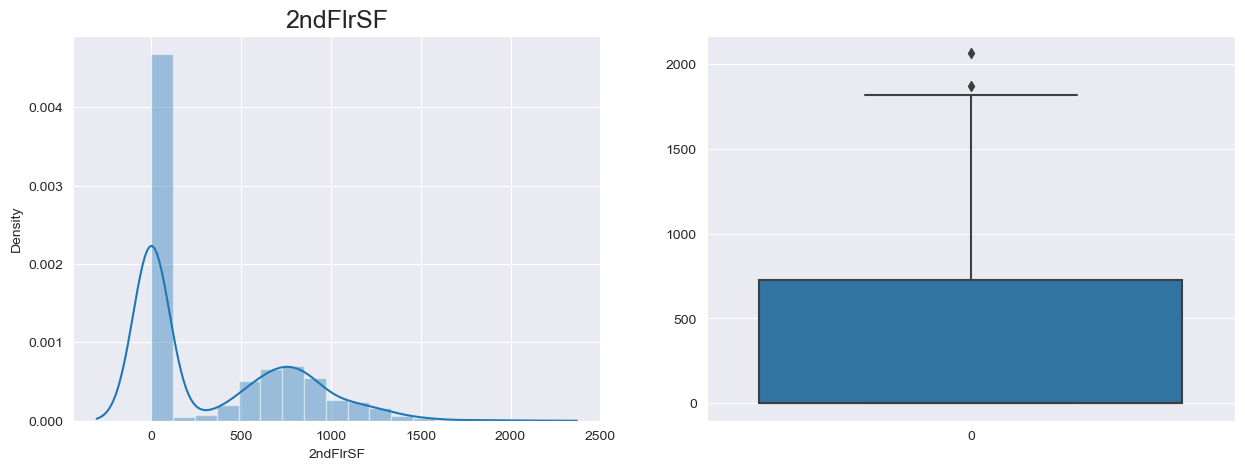

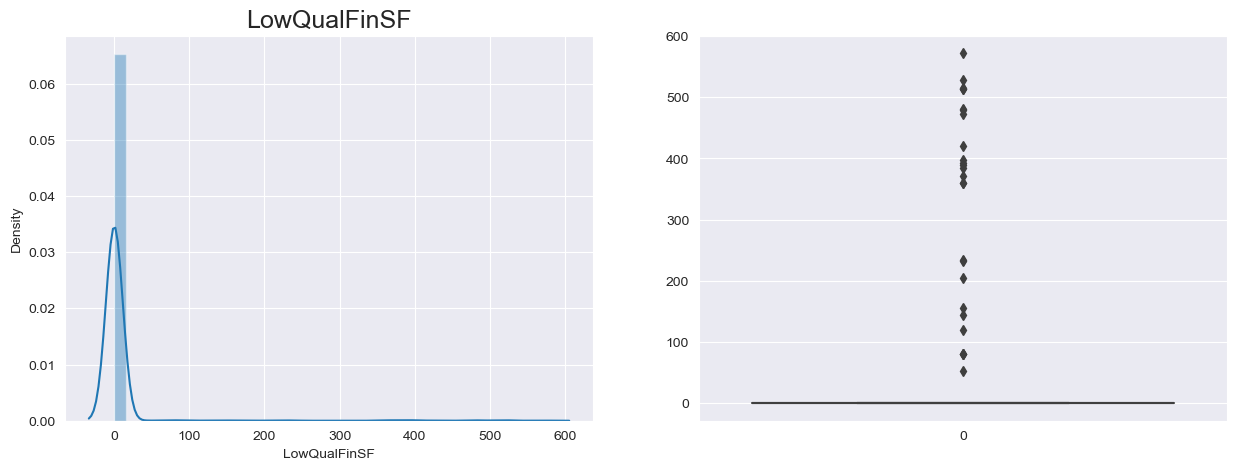

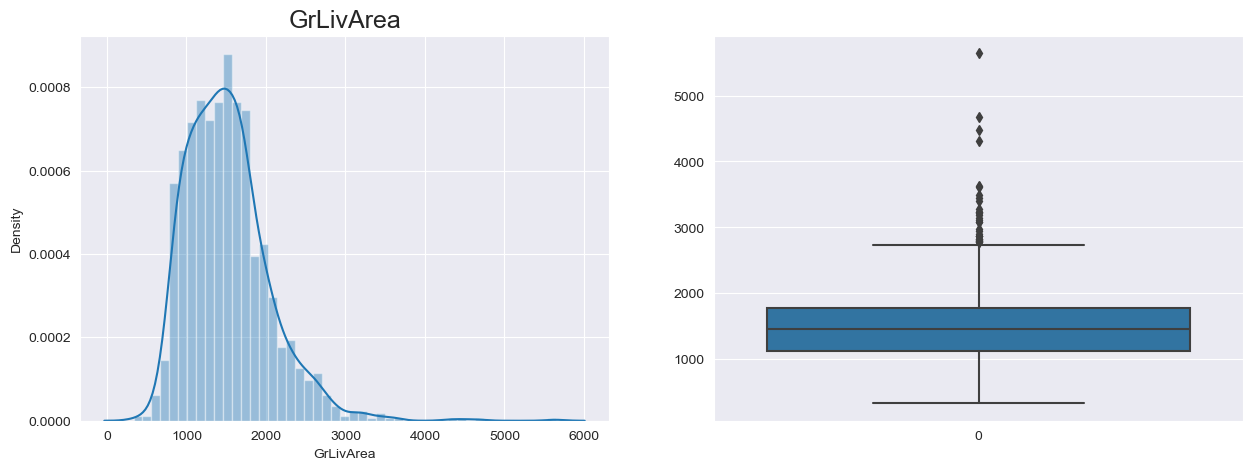

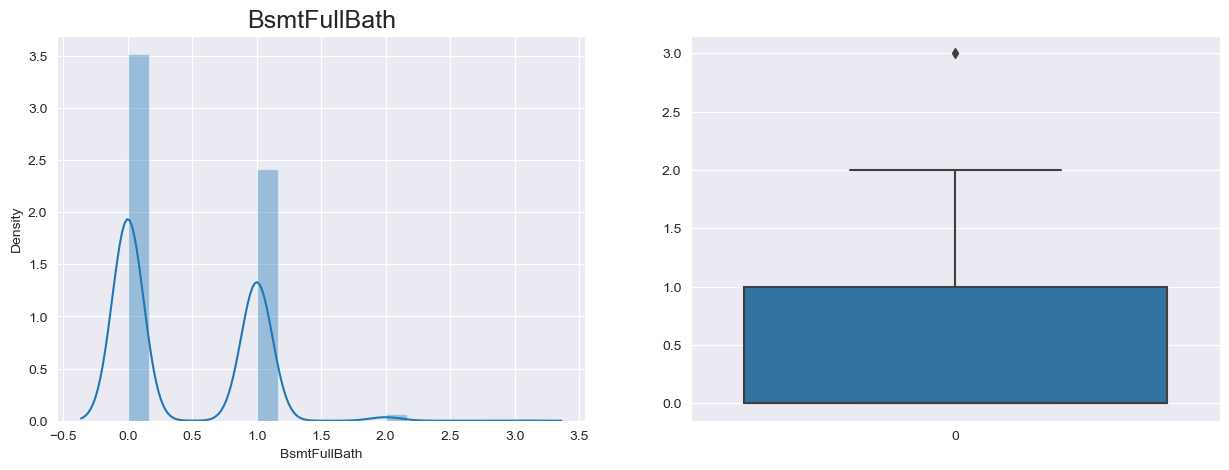

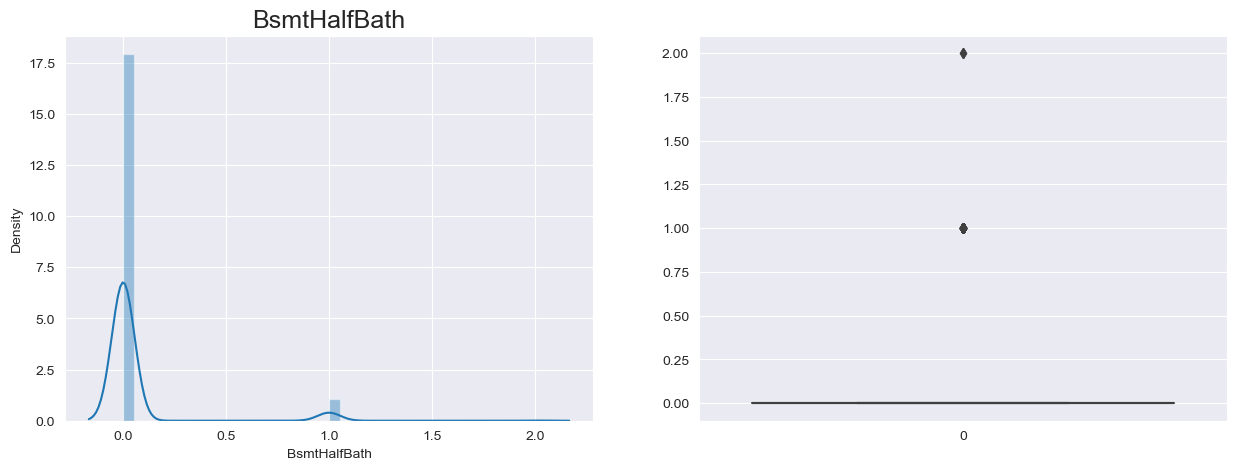

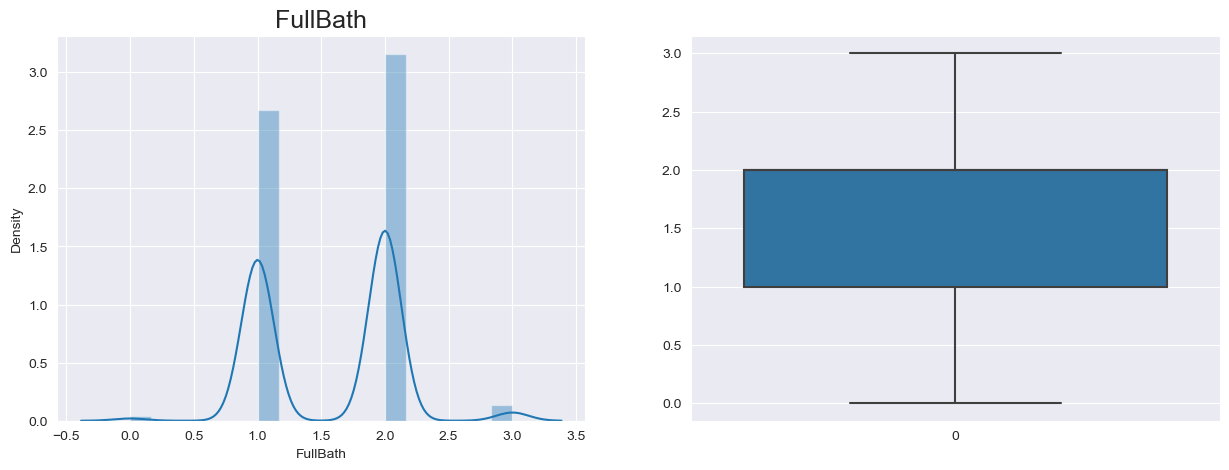

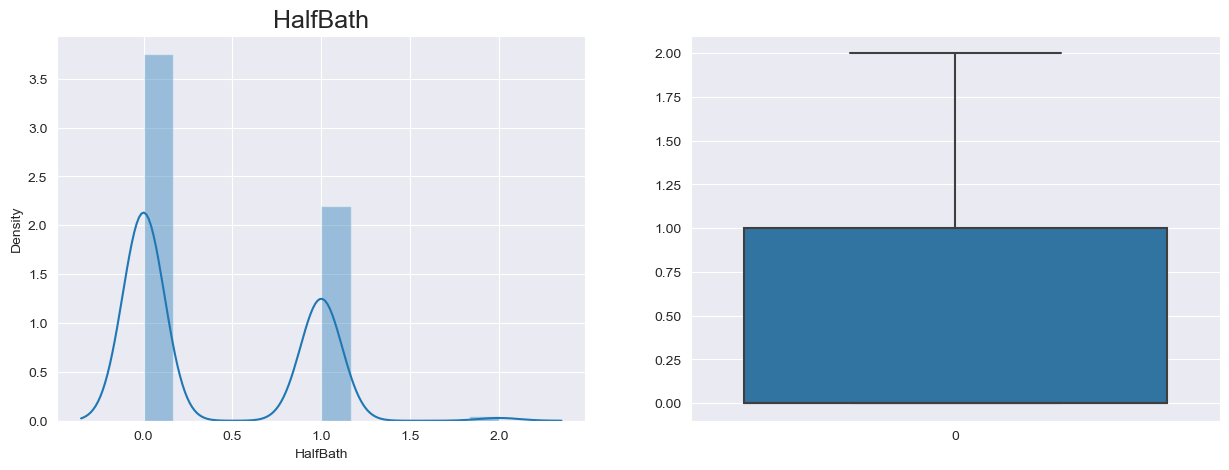

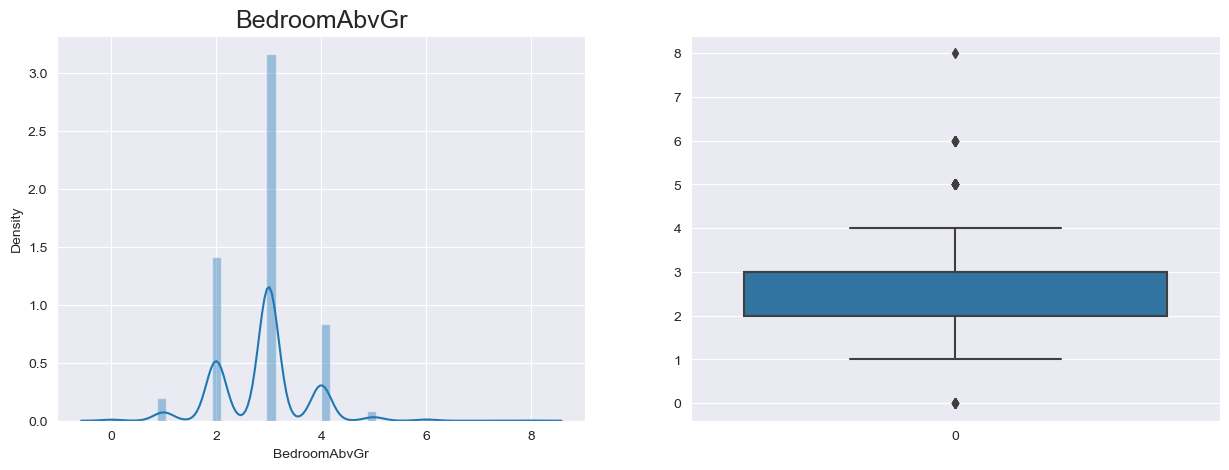

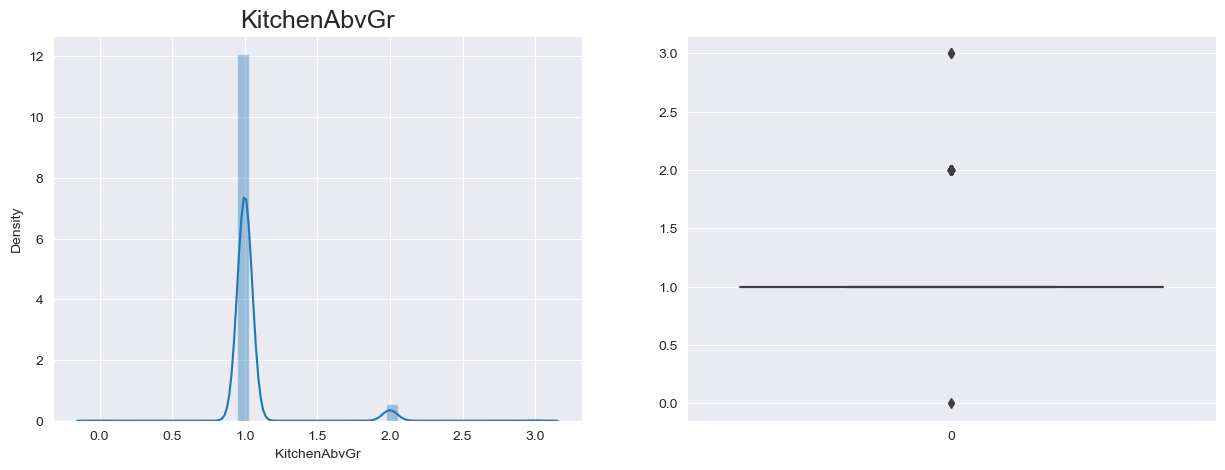

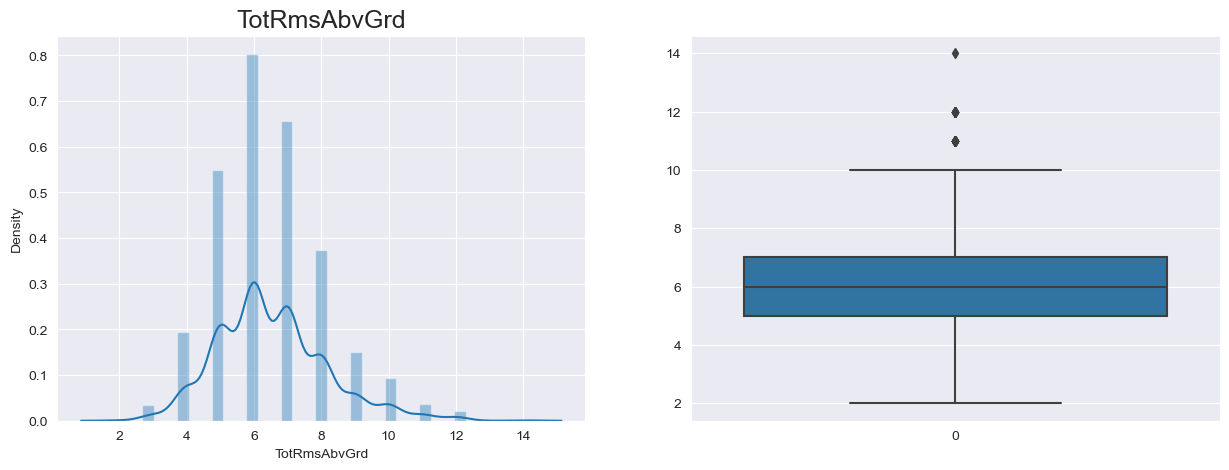

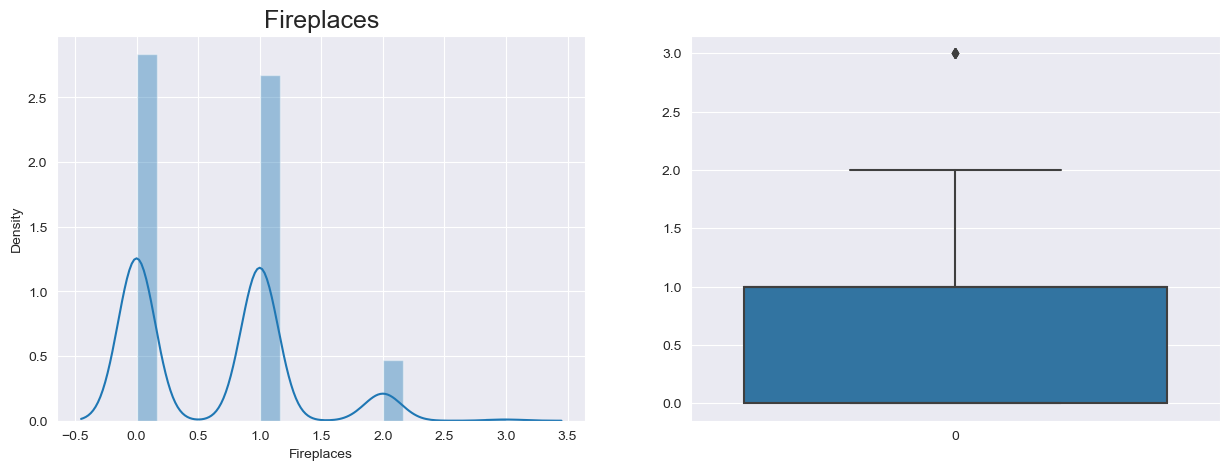

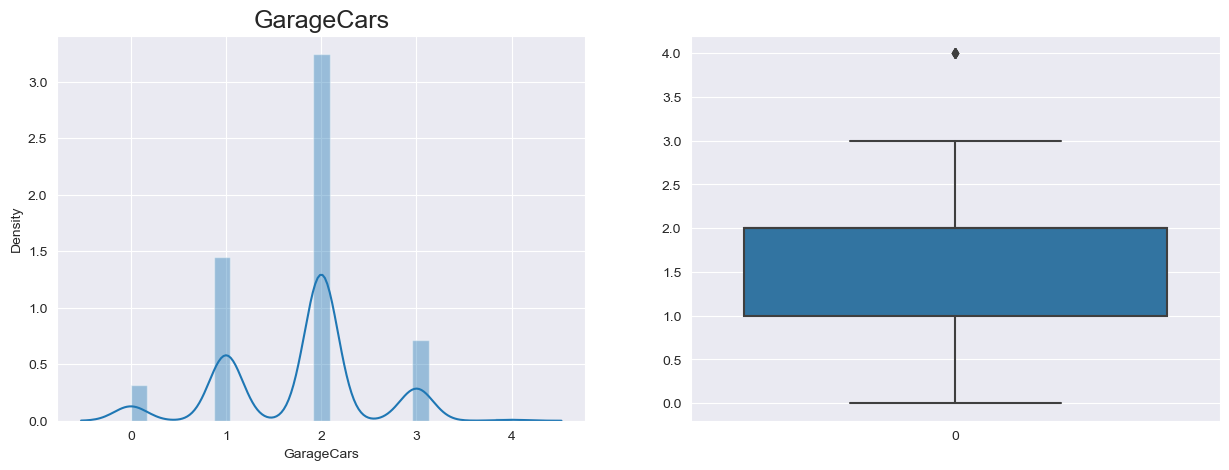

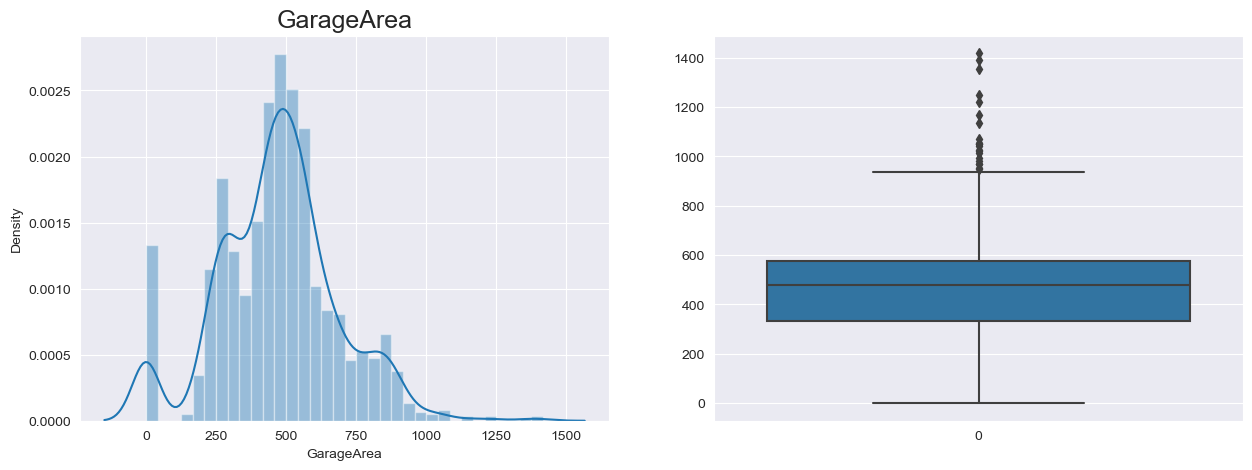

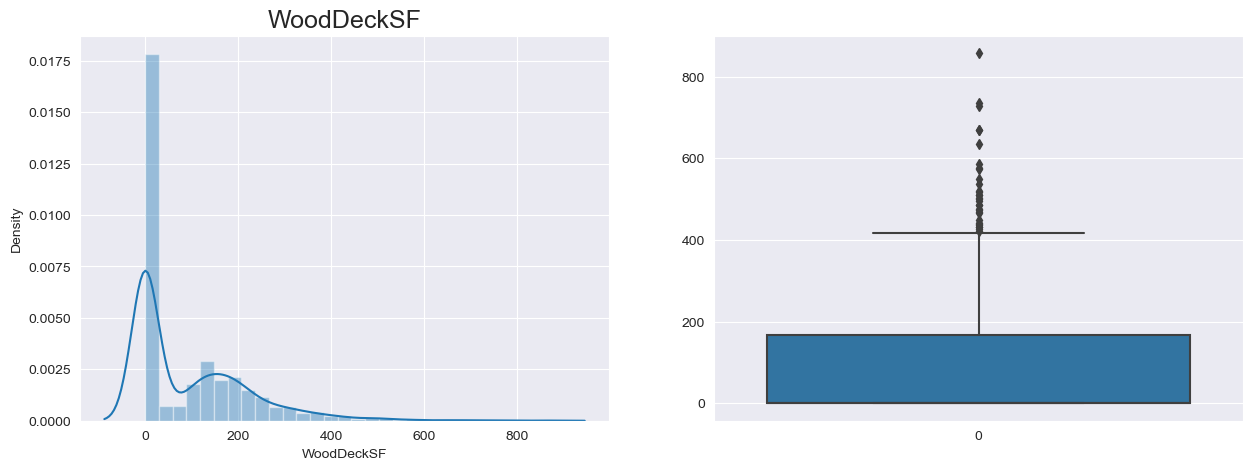

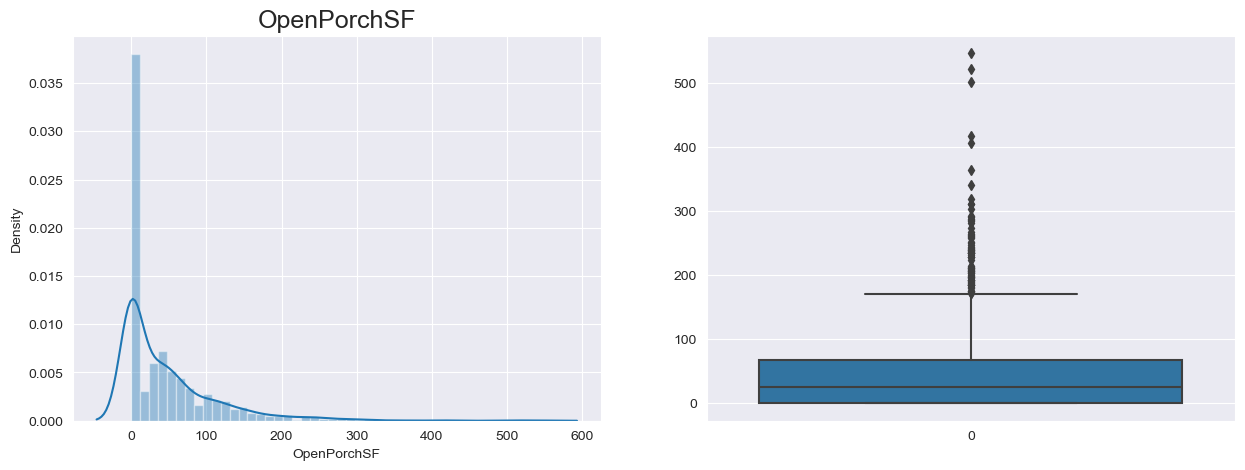

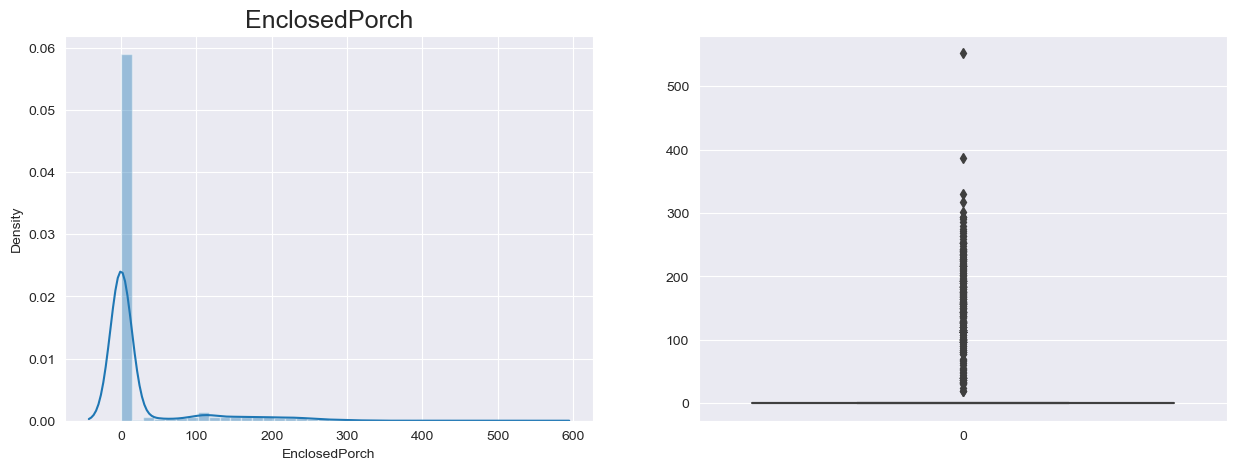

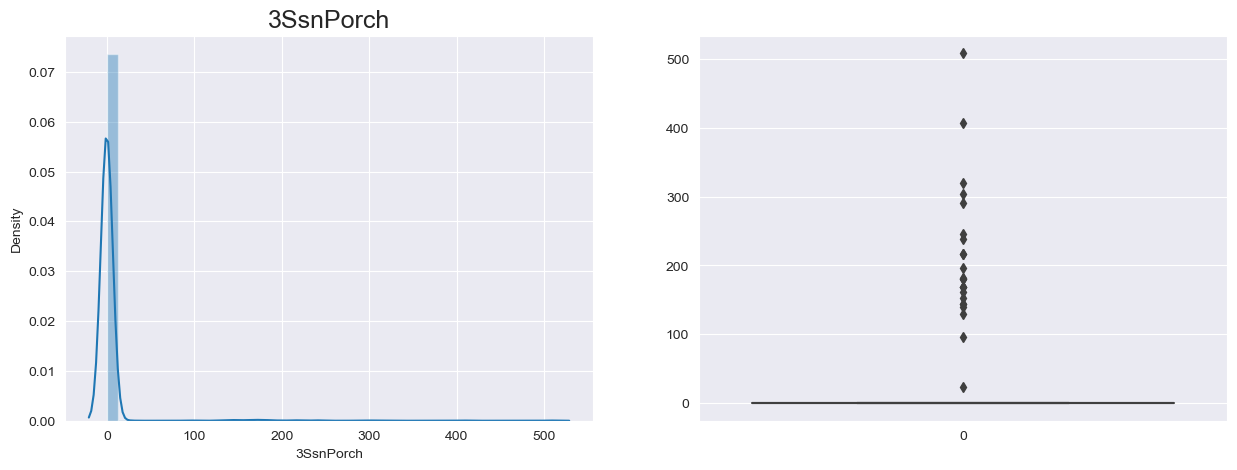

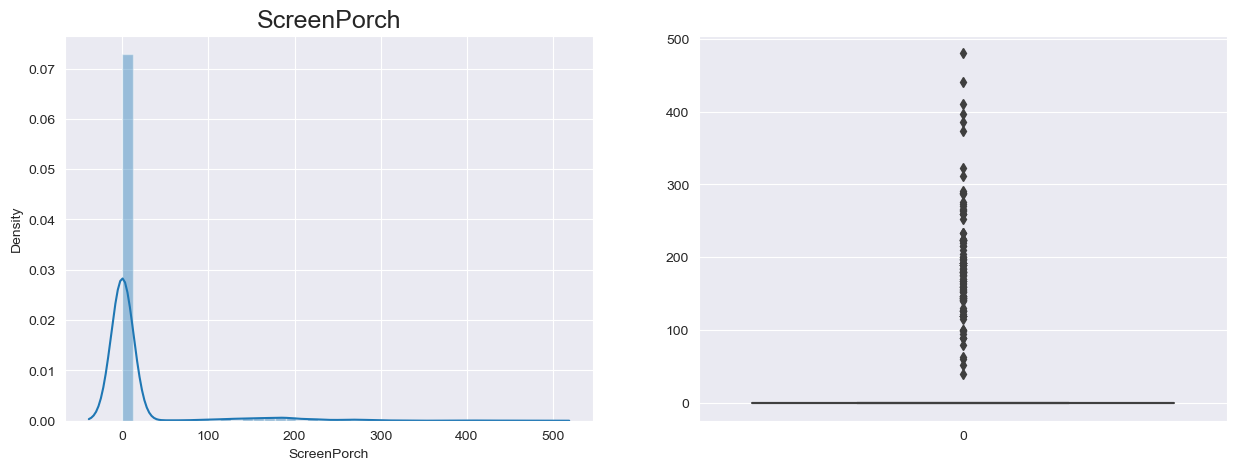

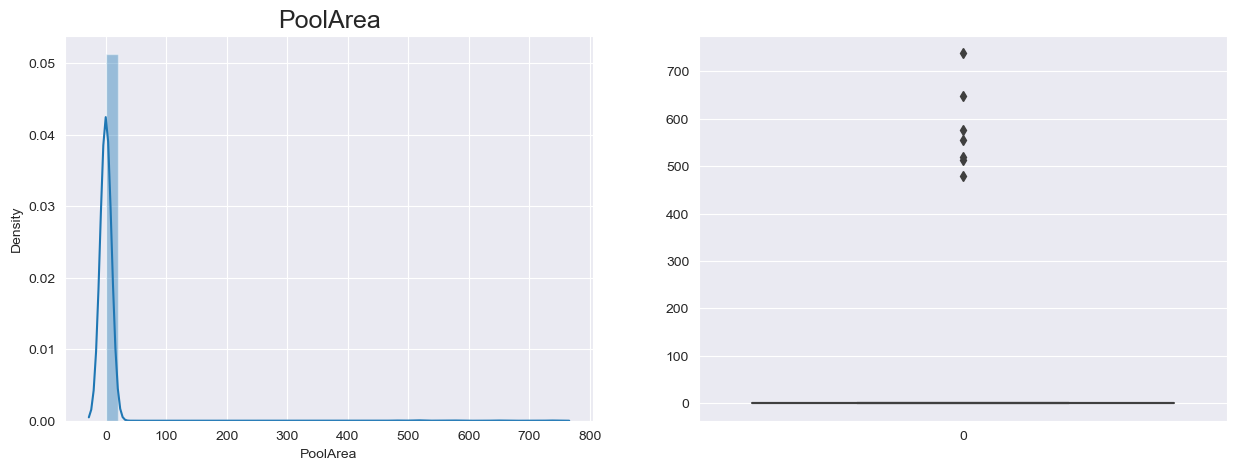

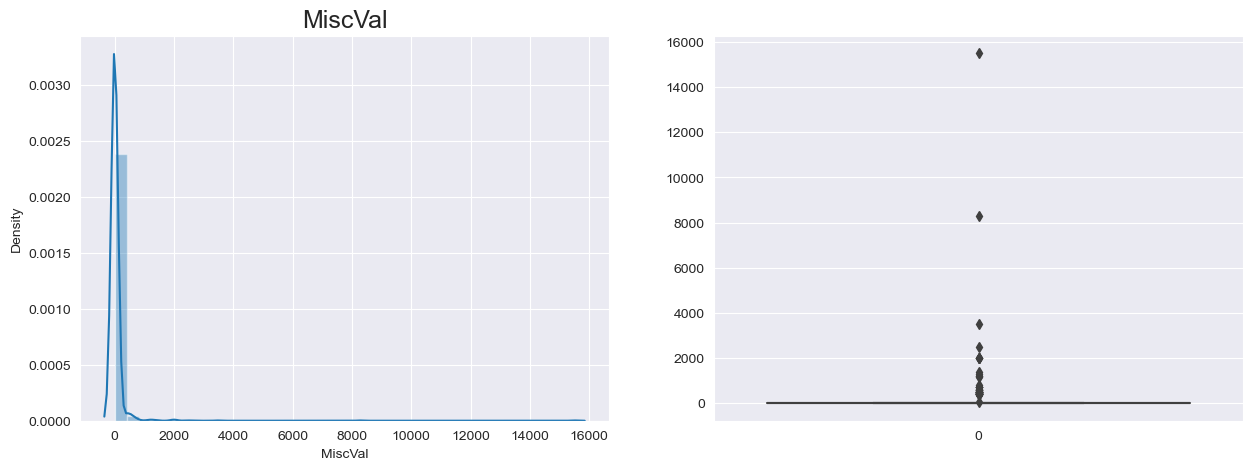

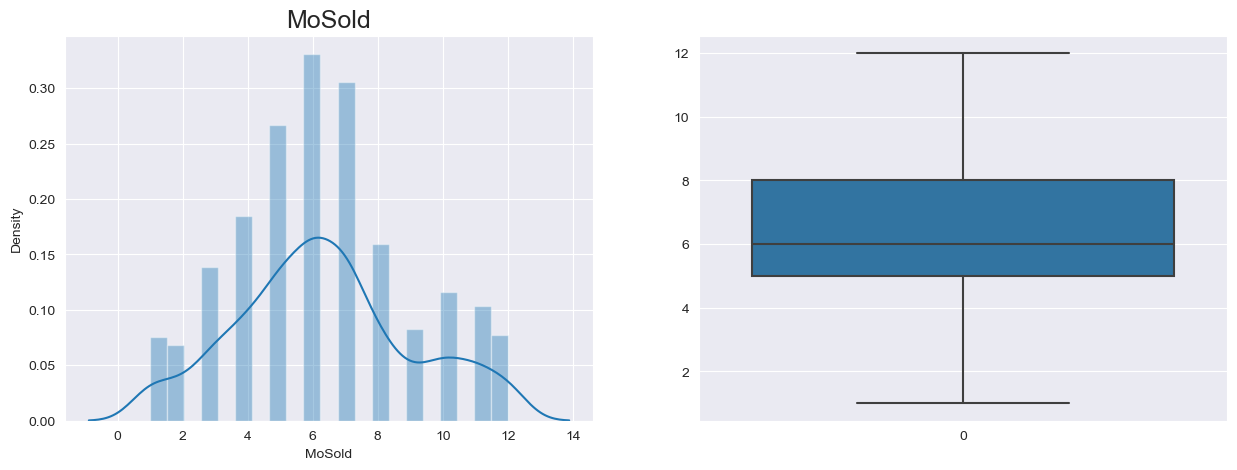

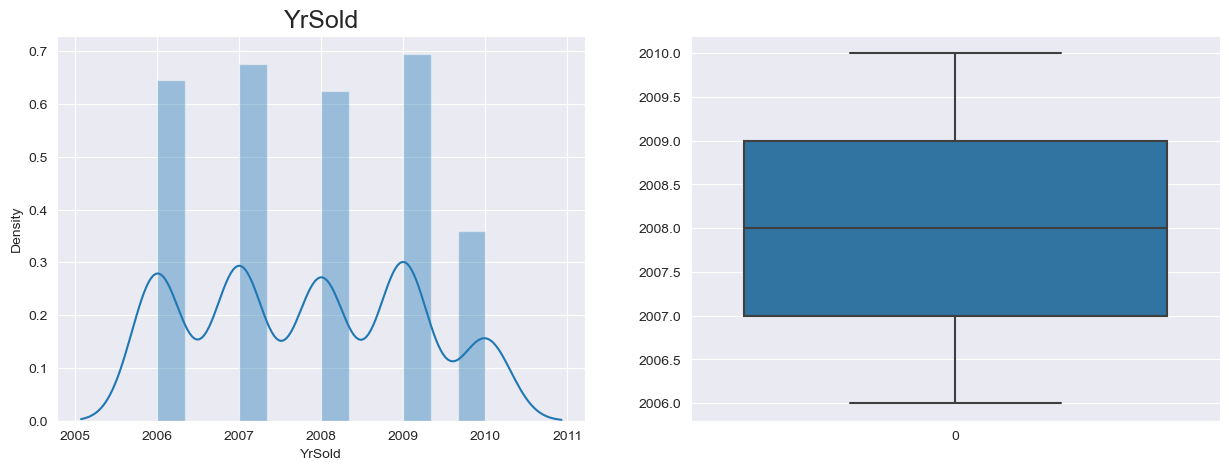

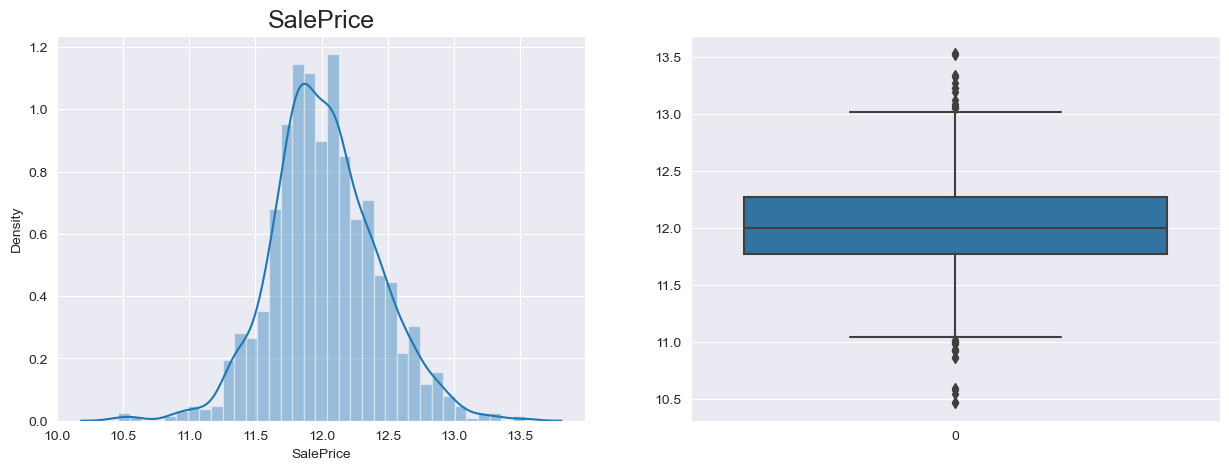

In [25]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()    

## EDA on Categorical Columns

In [26]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

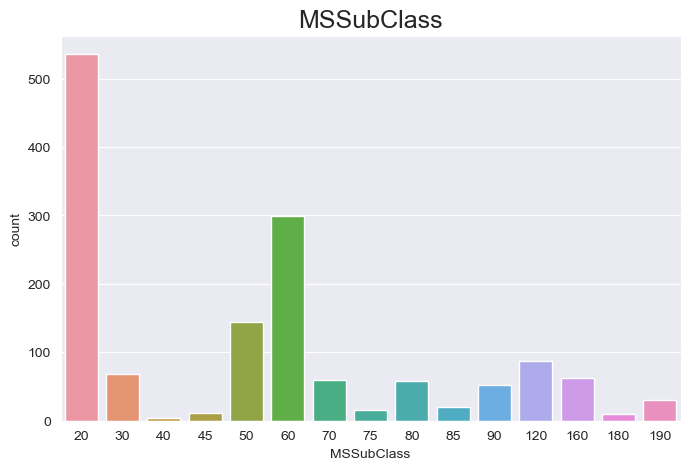

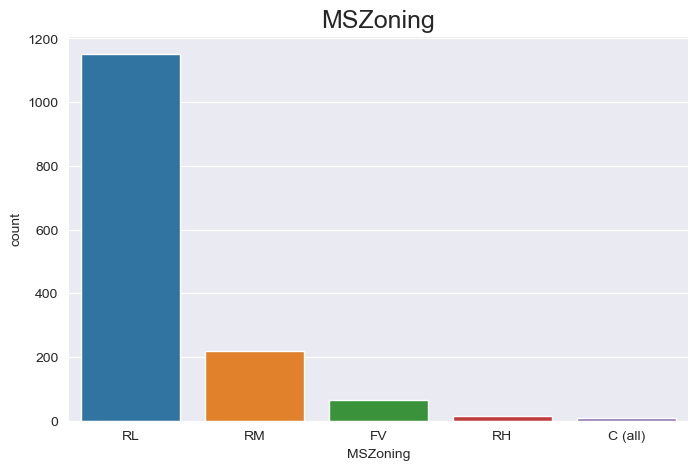

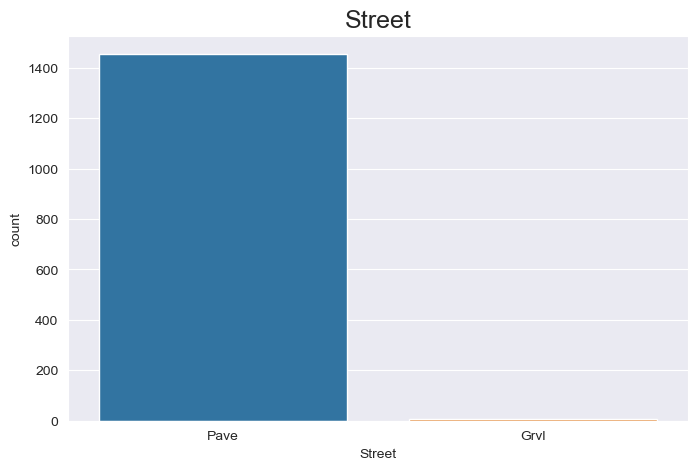

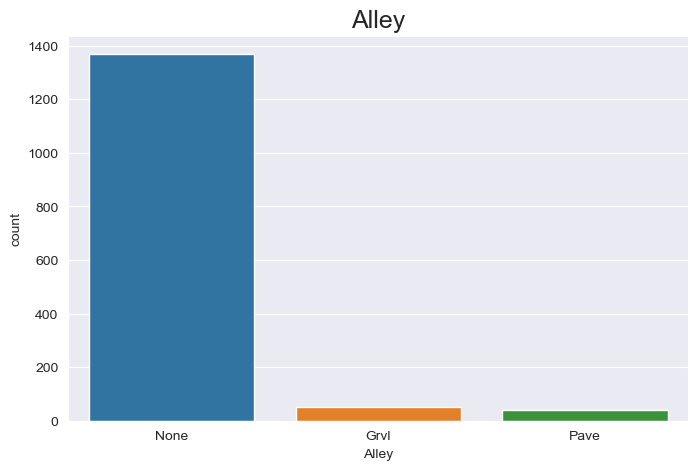

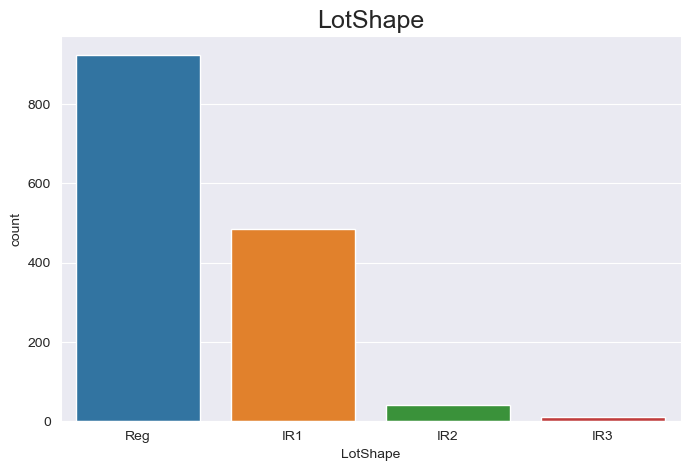

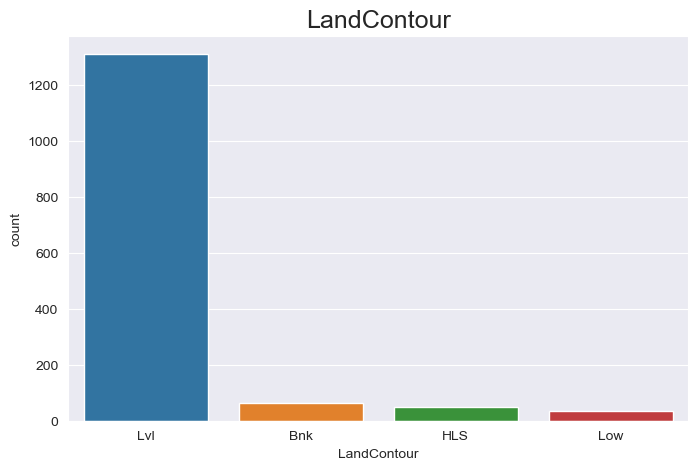

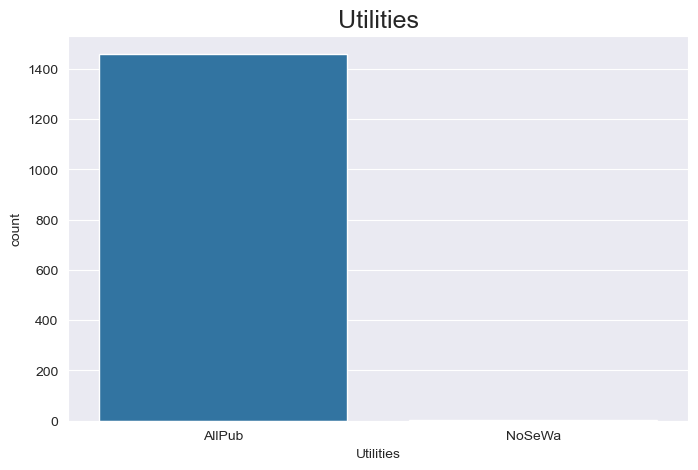

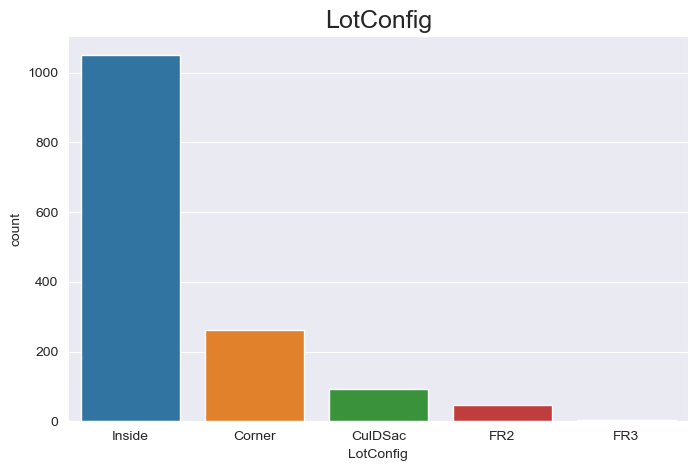

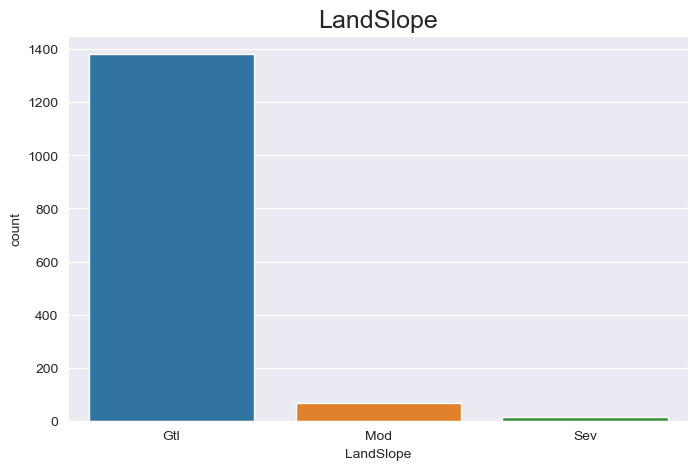

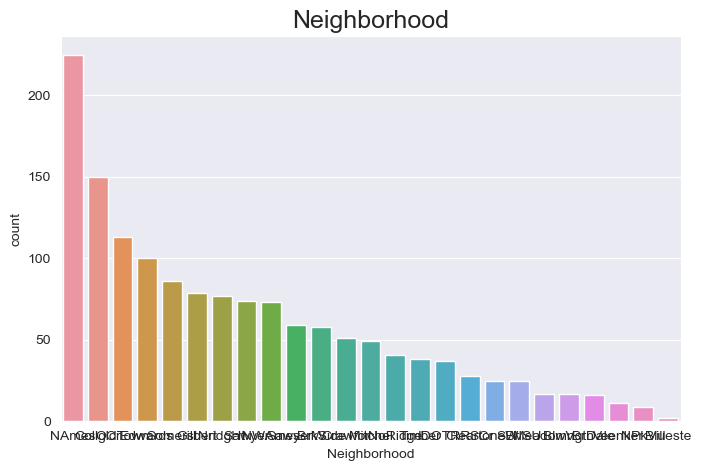

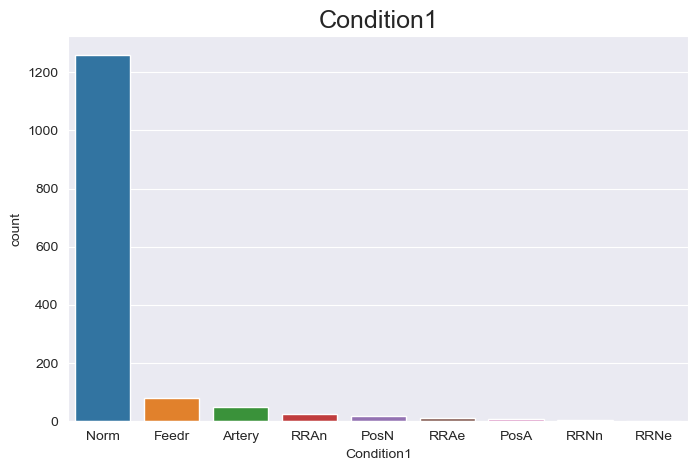

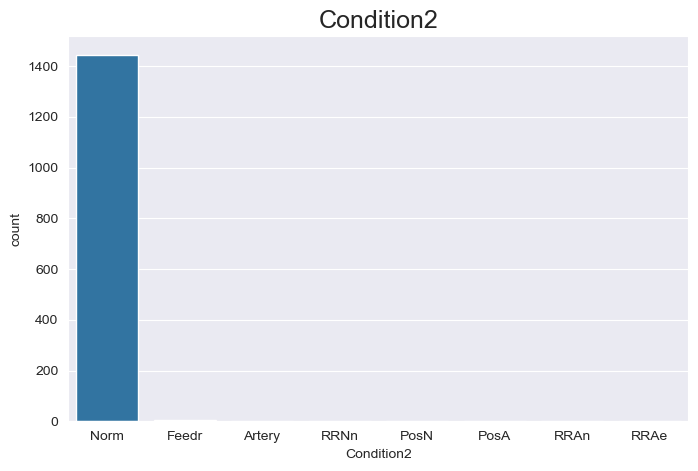

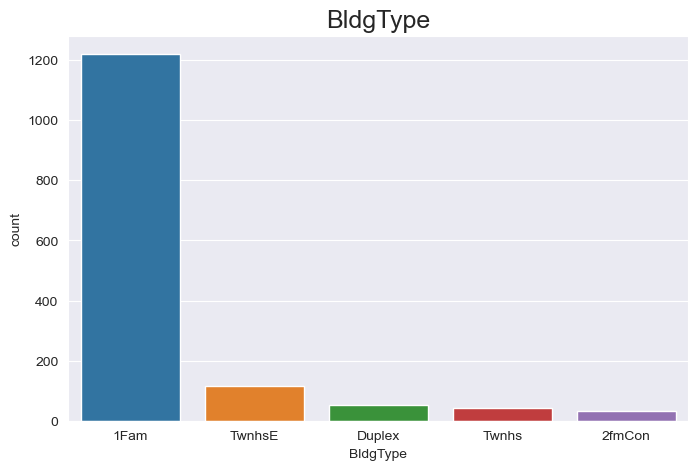

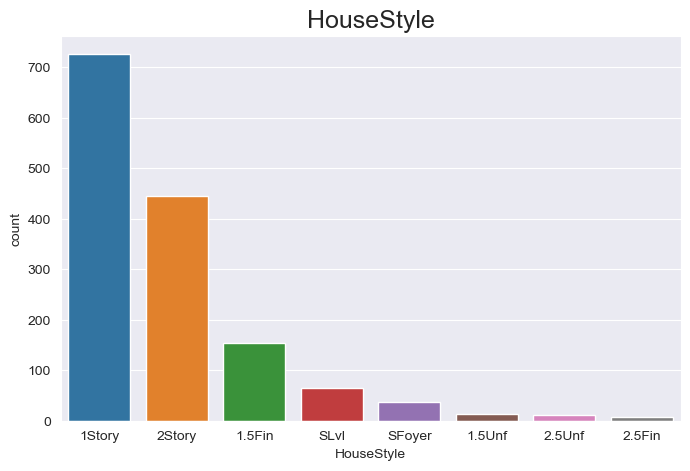

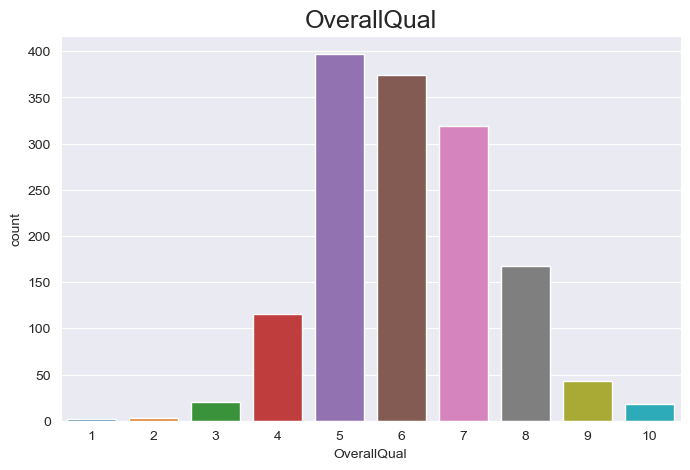

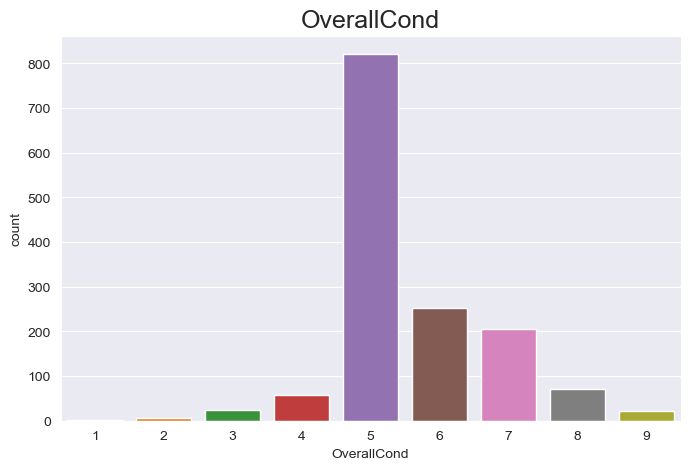

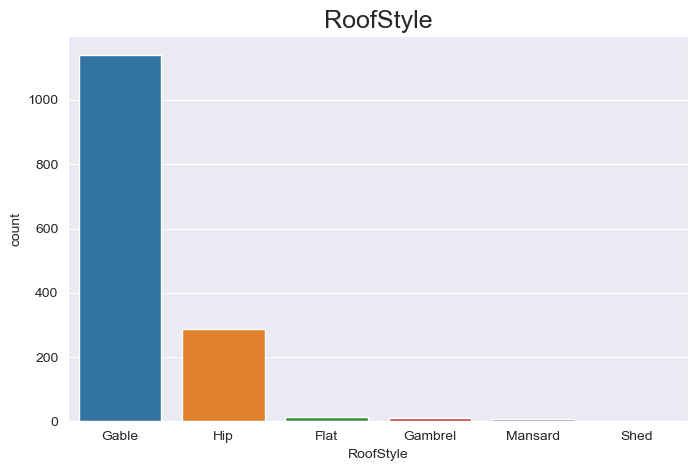

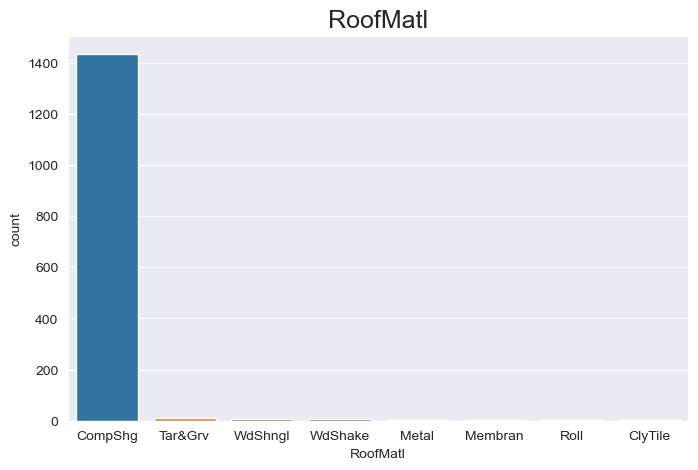

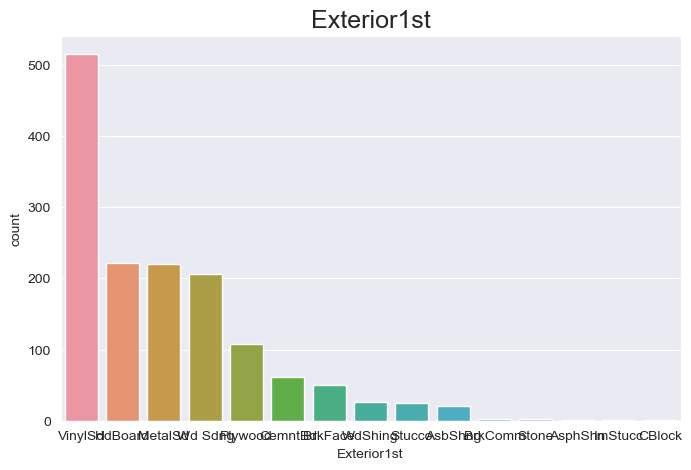

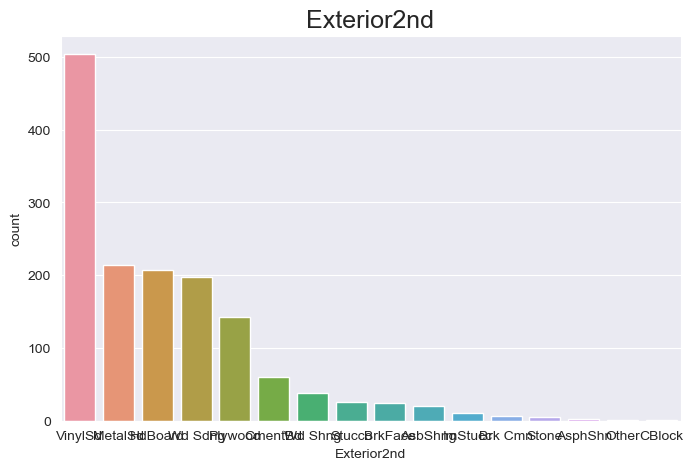

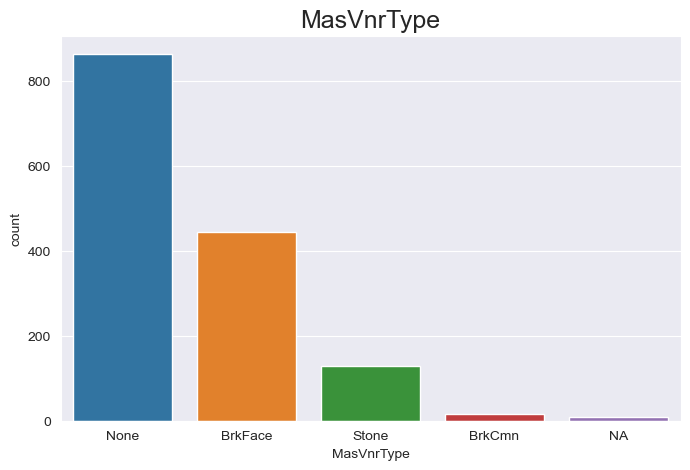

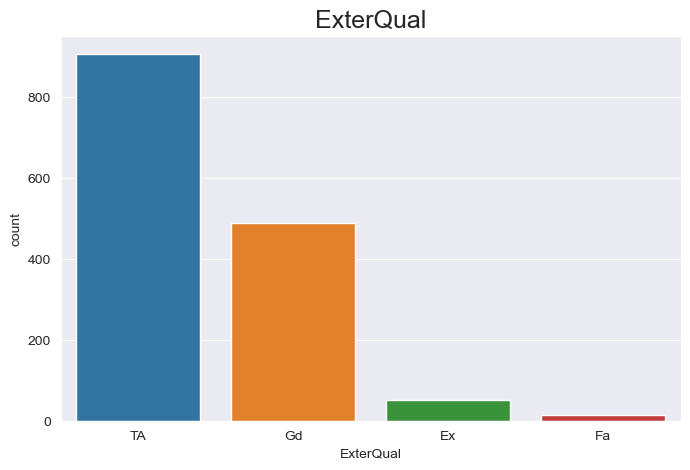

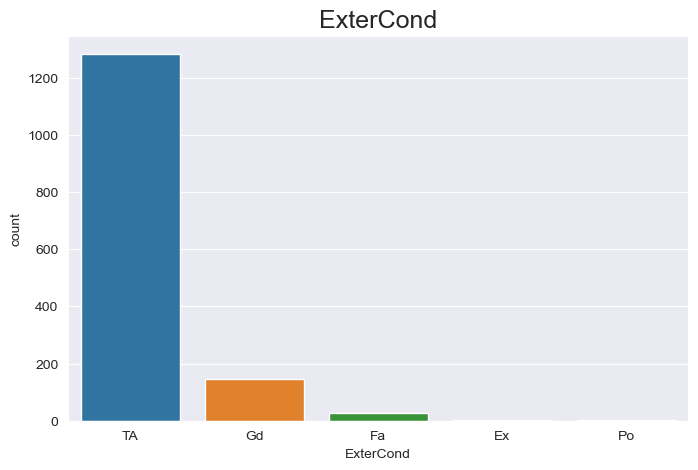

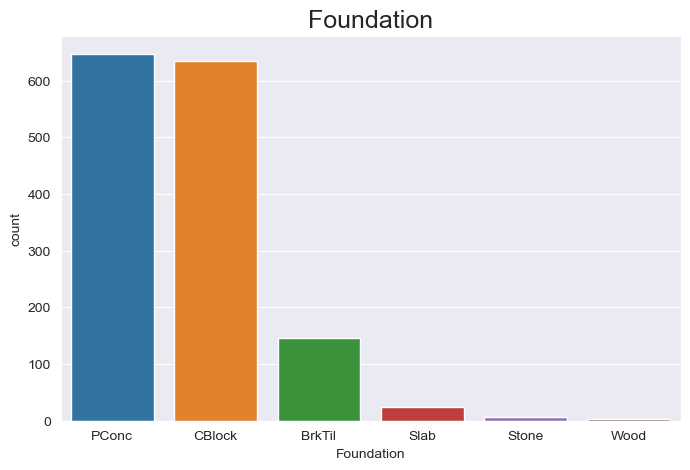

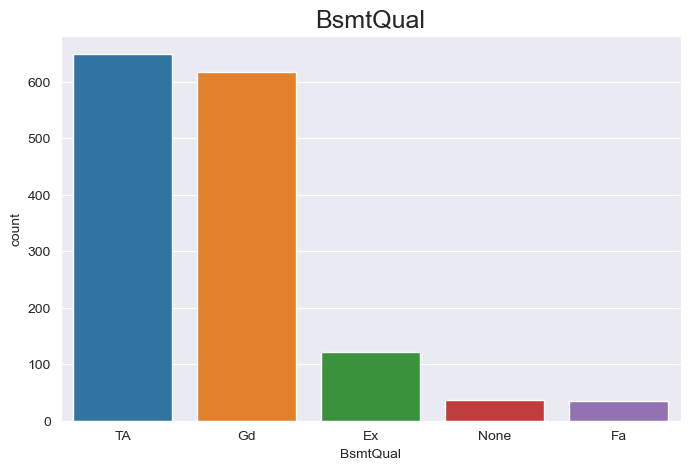

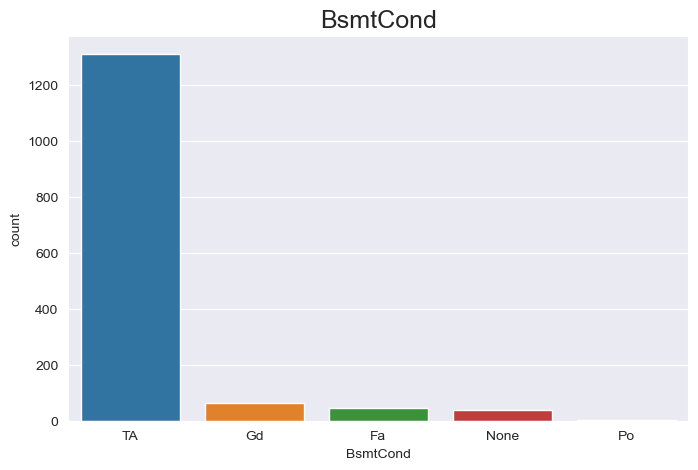

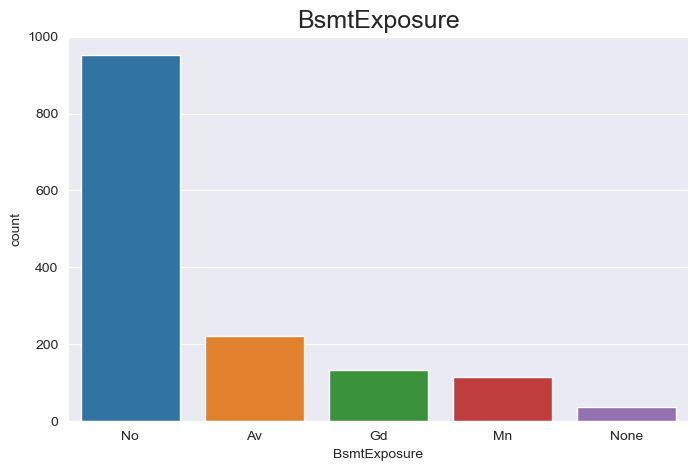

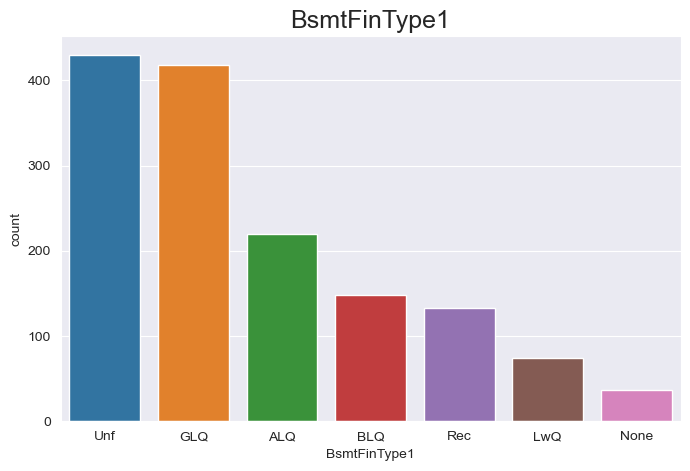

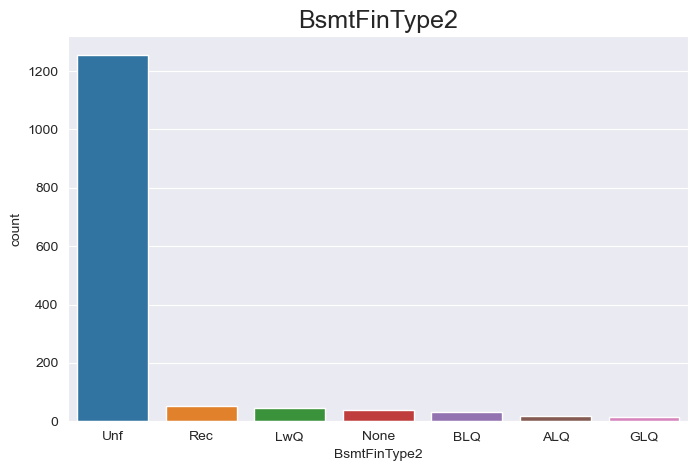

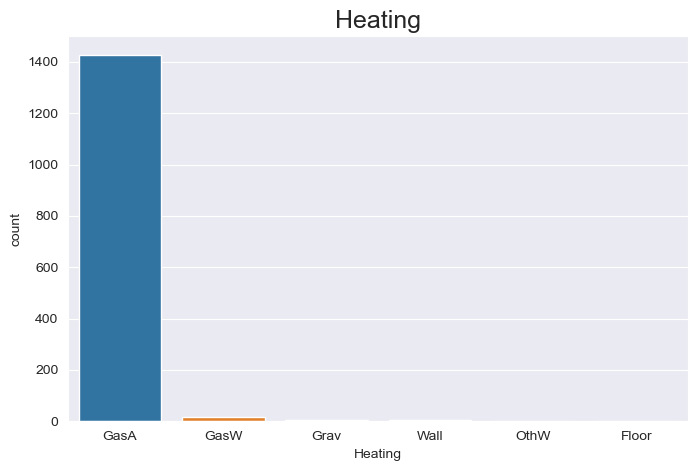

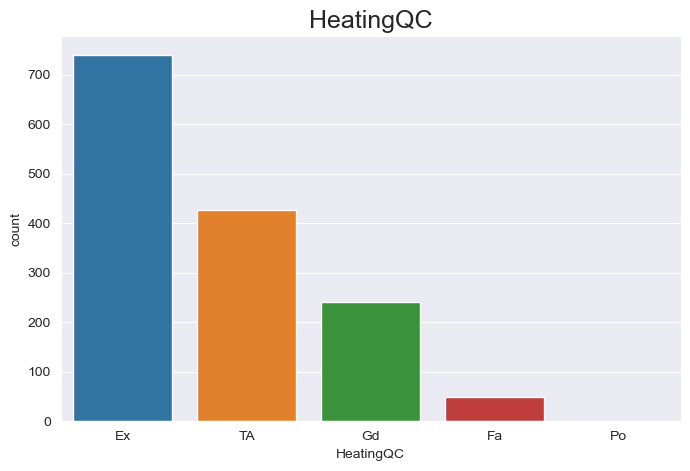

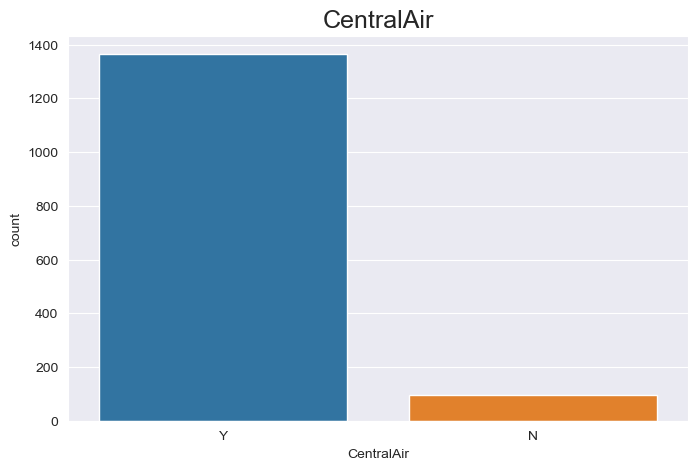

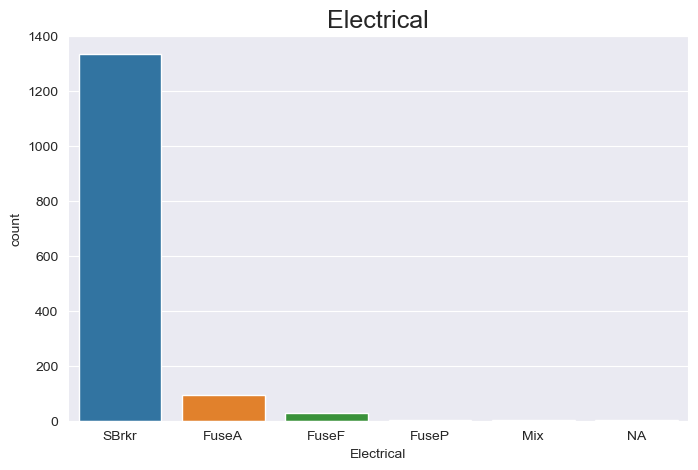

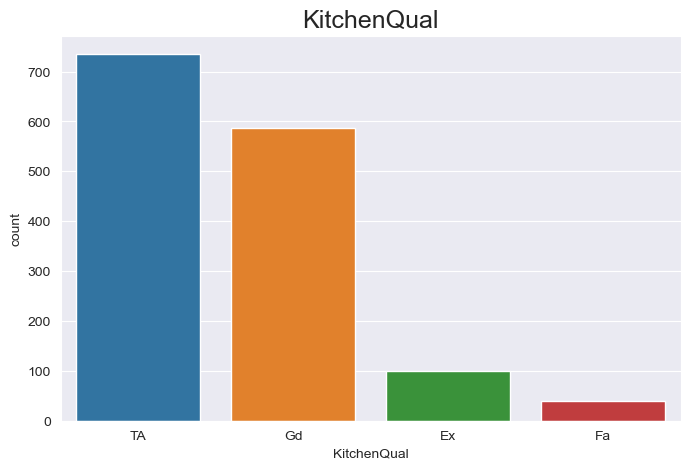

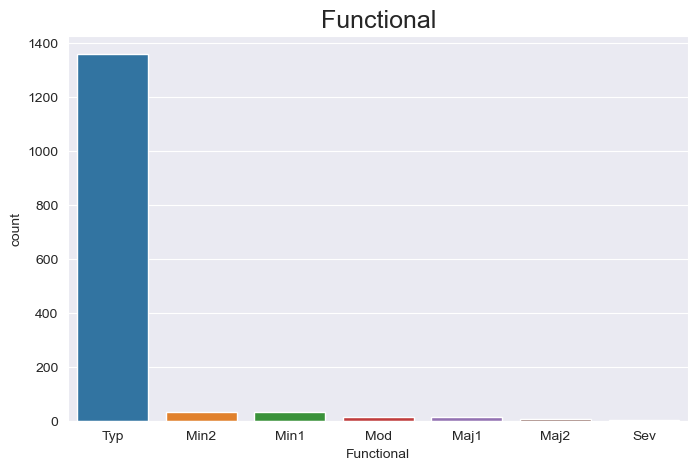

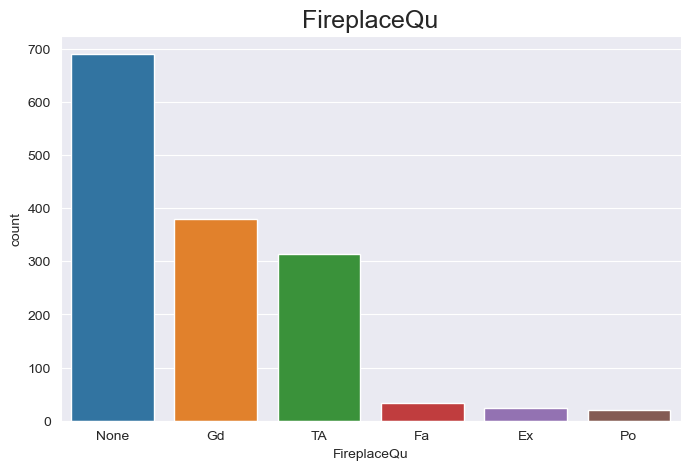

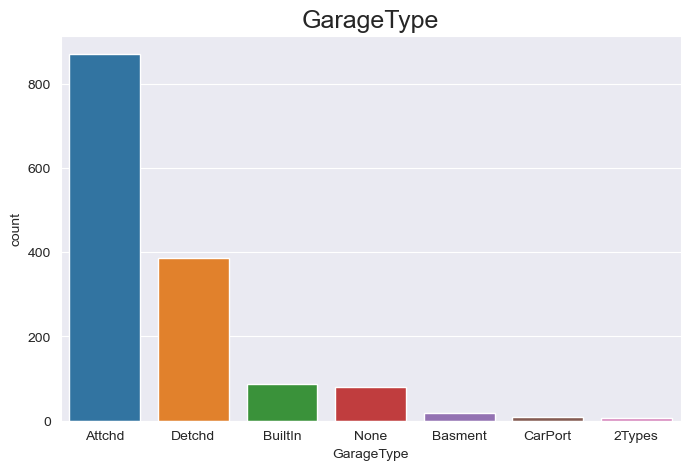

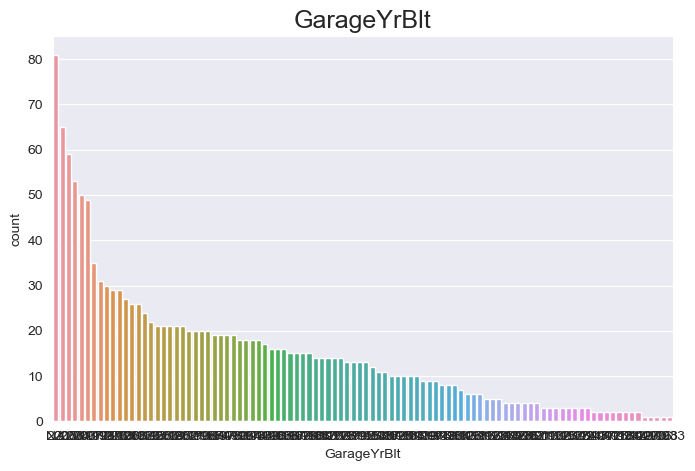

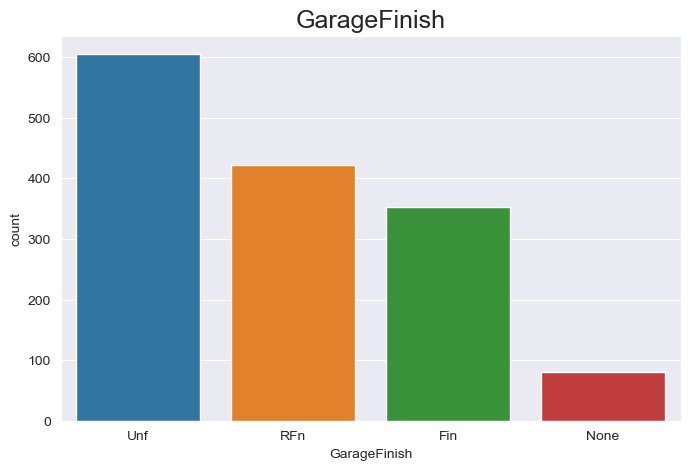

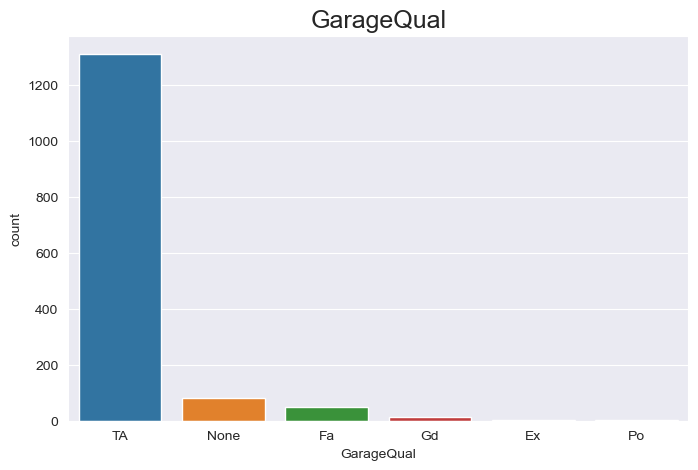

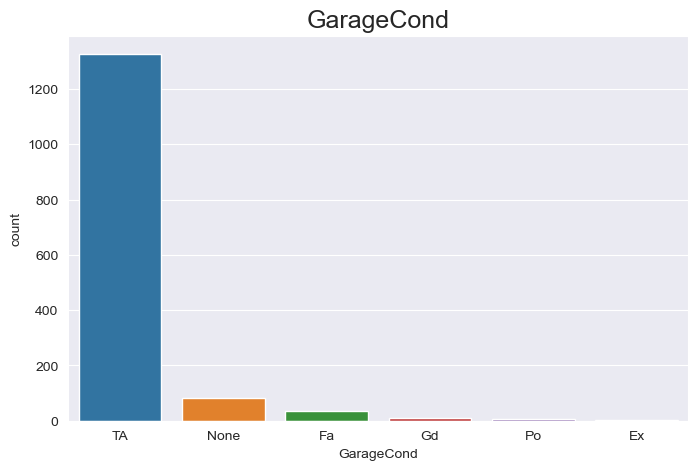

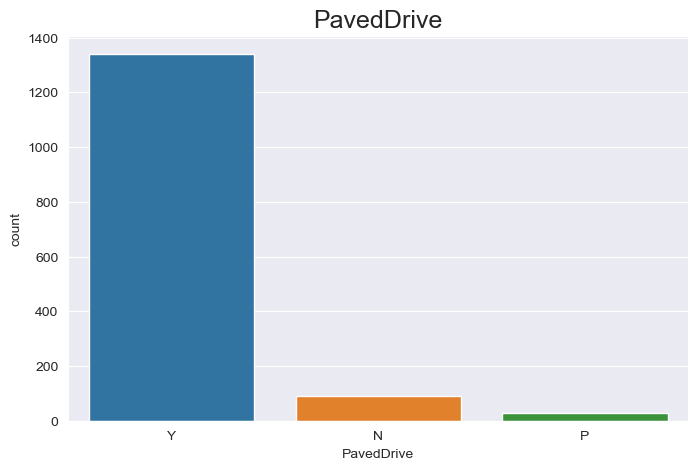

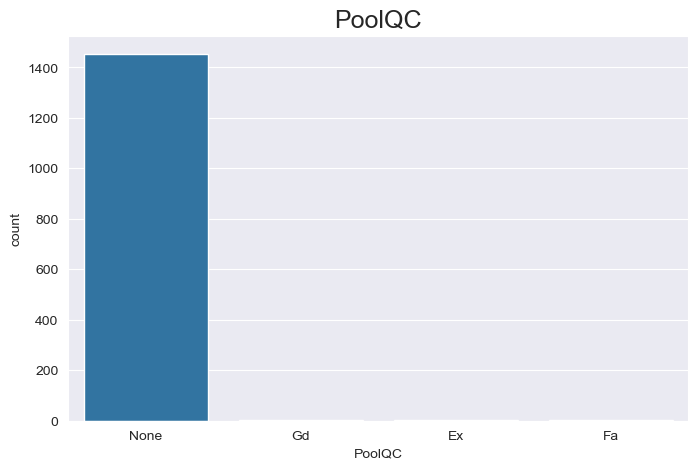

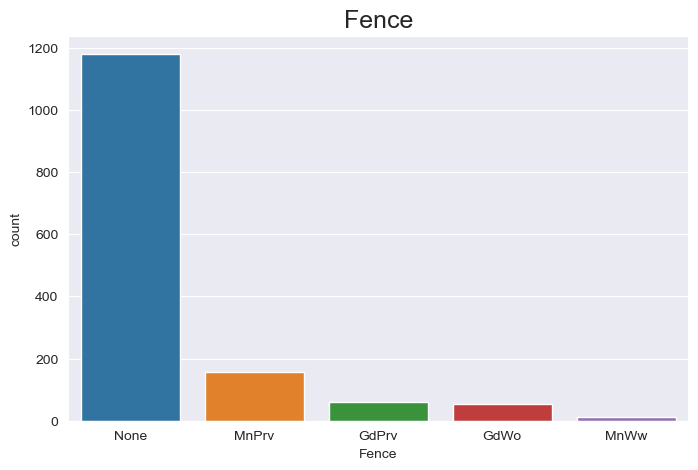

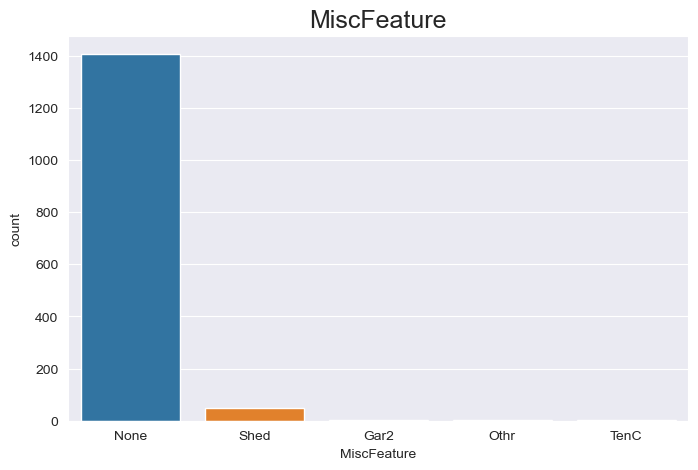

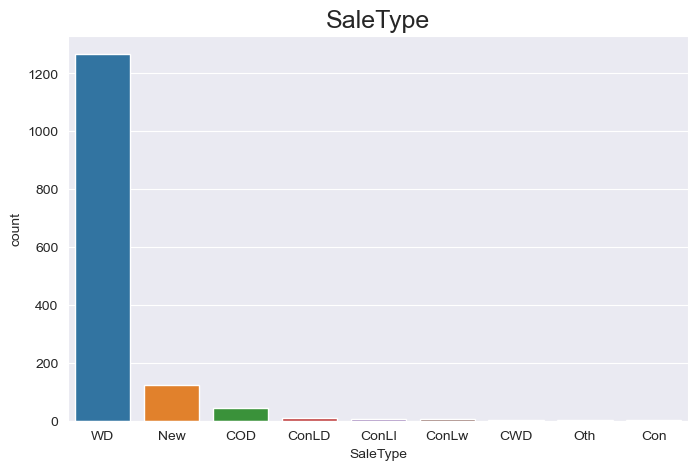

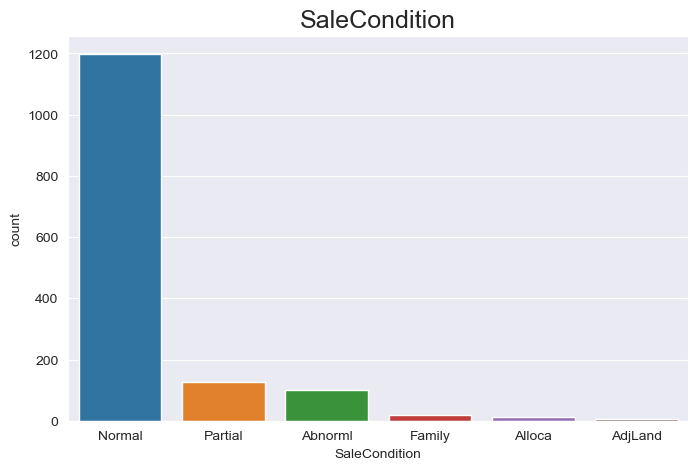

In [32]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=df_cat[col].value_counts().index,y= df_cat[col].value_counts())
    plt.show()

## Bivariate Analysis

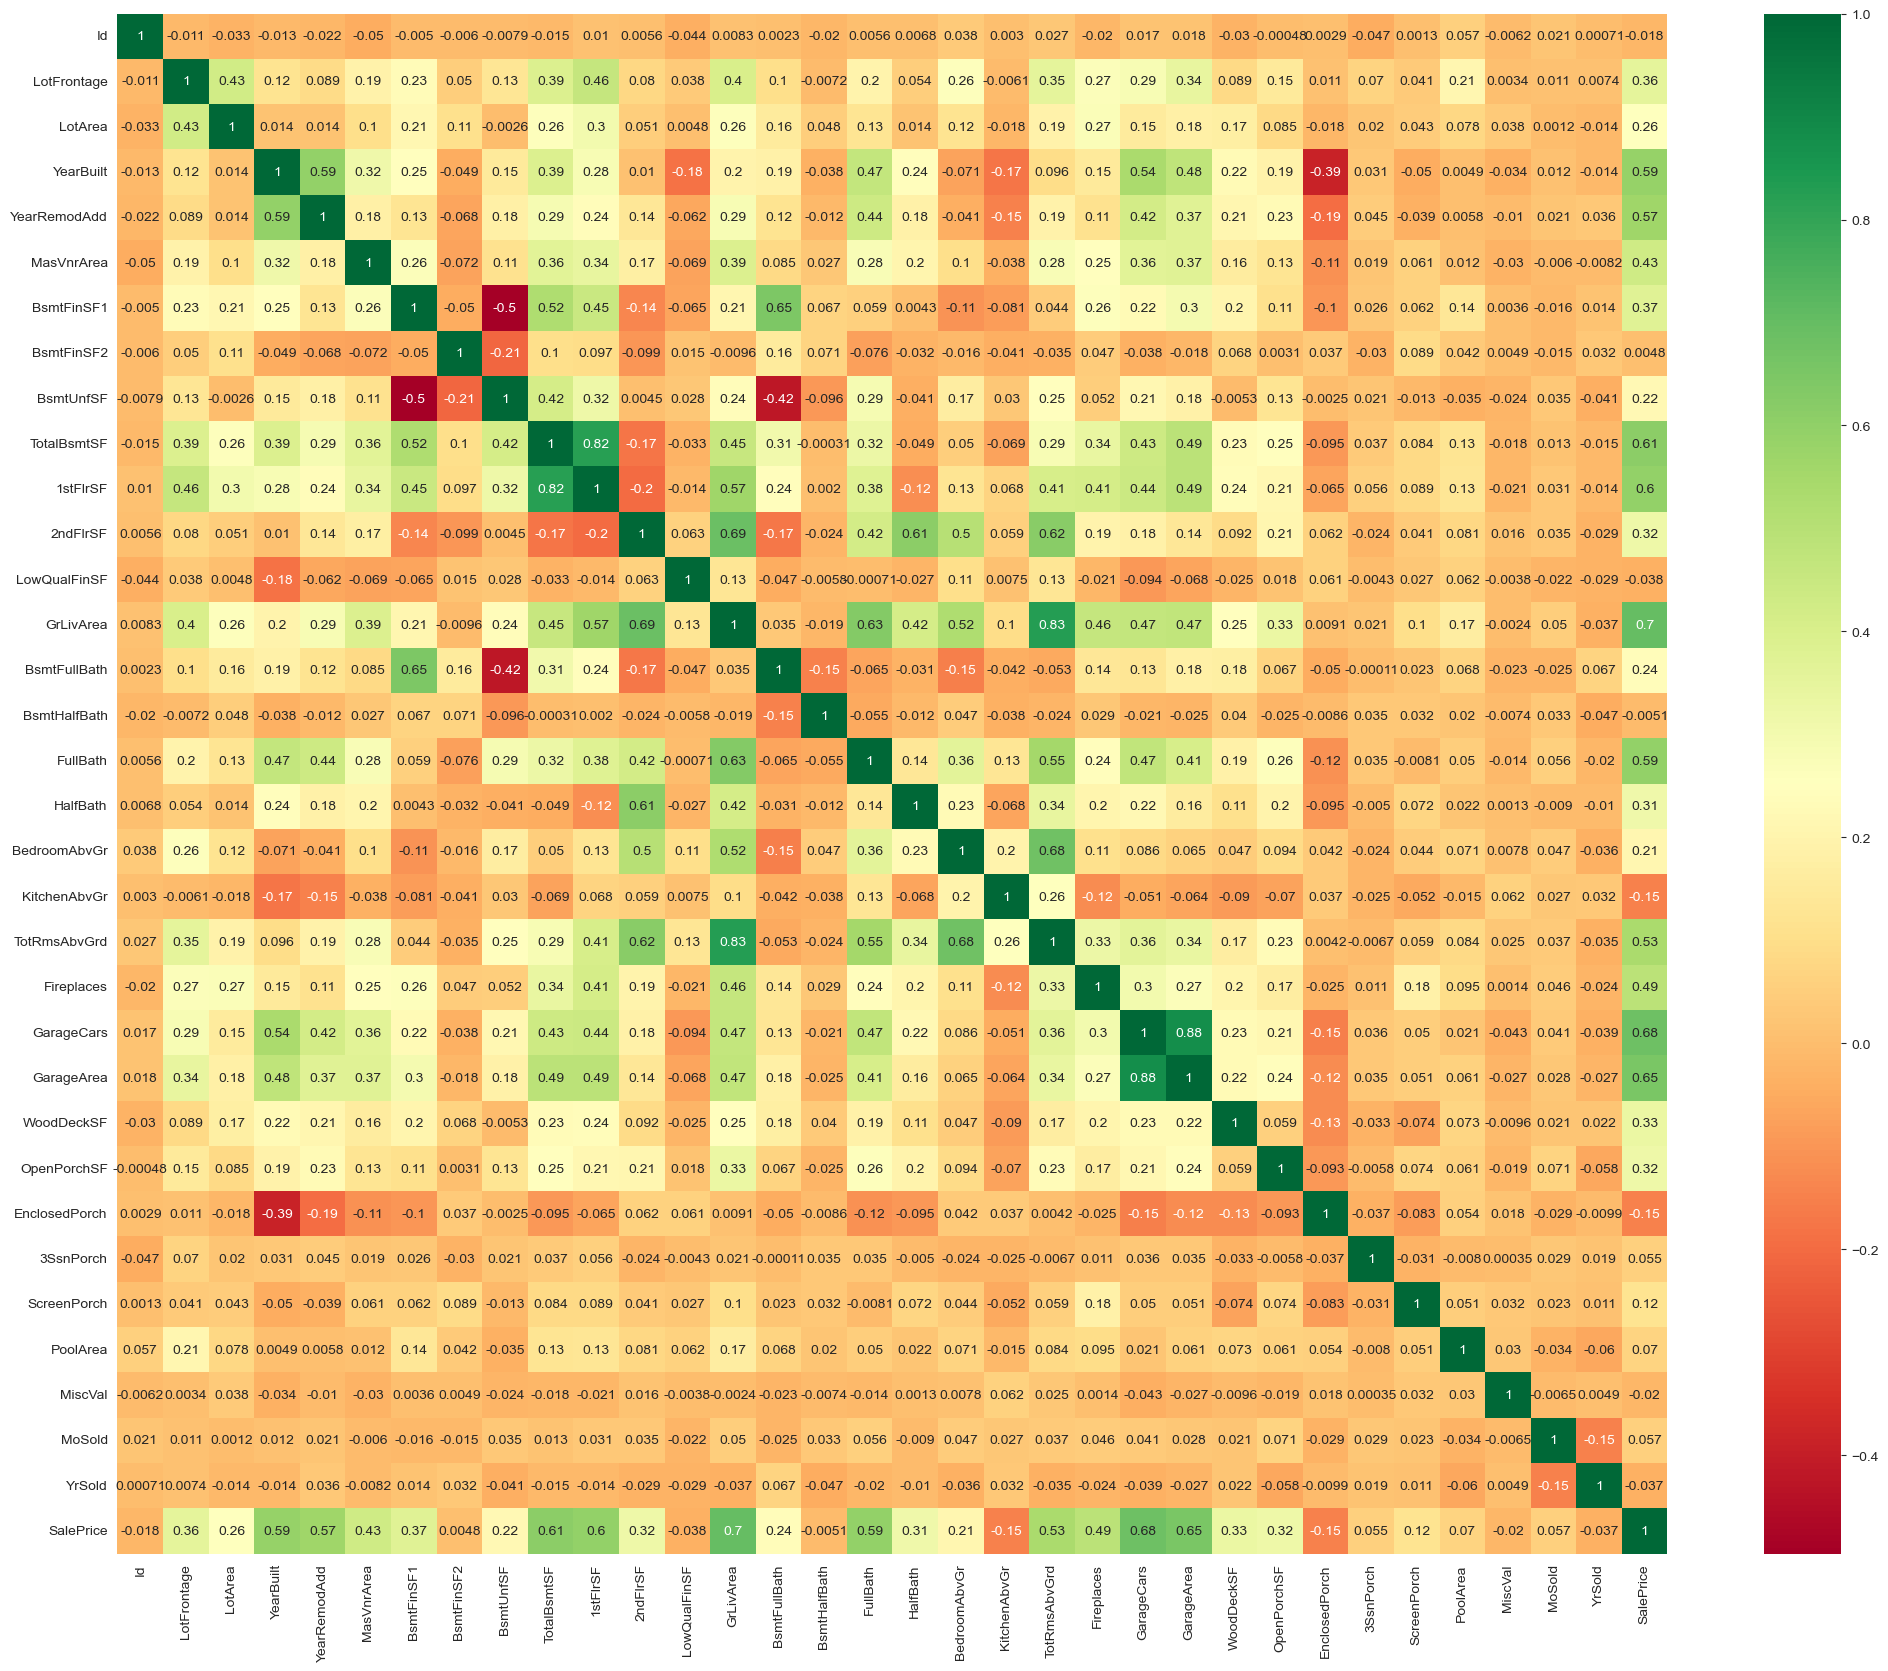

In [33]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

##  Feature Engineering 

In [35]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [36]:
## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [37]:
## View the dataframe again
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,WD,Normal,12.429216,8


In [38]:
## View the missing values in all features
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Age                0
Length: 80, dtype: int64

In [39]:
## Replacing missing values in the above meniioned two columns by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [40]:
## Check for missing values again 
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Age              0
Length: 80, dtype: int64

In [41]:
## Separate the categorical and numerical features again from original dataframe
## (as we have added one feature and removed two from original data)
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [42]:
## One hot encoding the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [43]:
## Check the dimensions
df_cat_encoded.shape

(1460, 353)

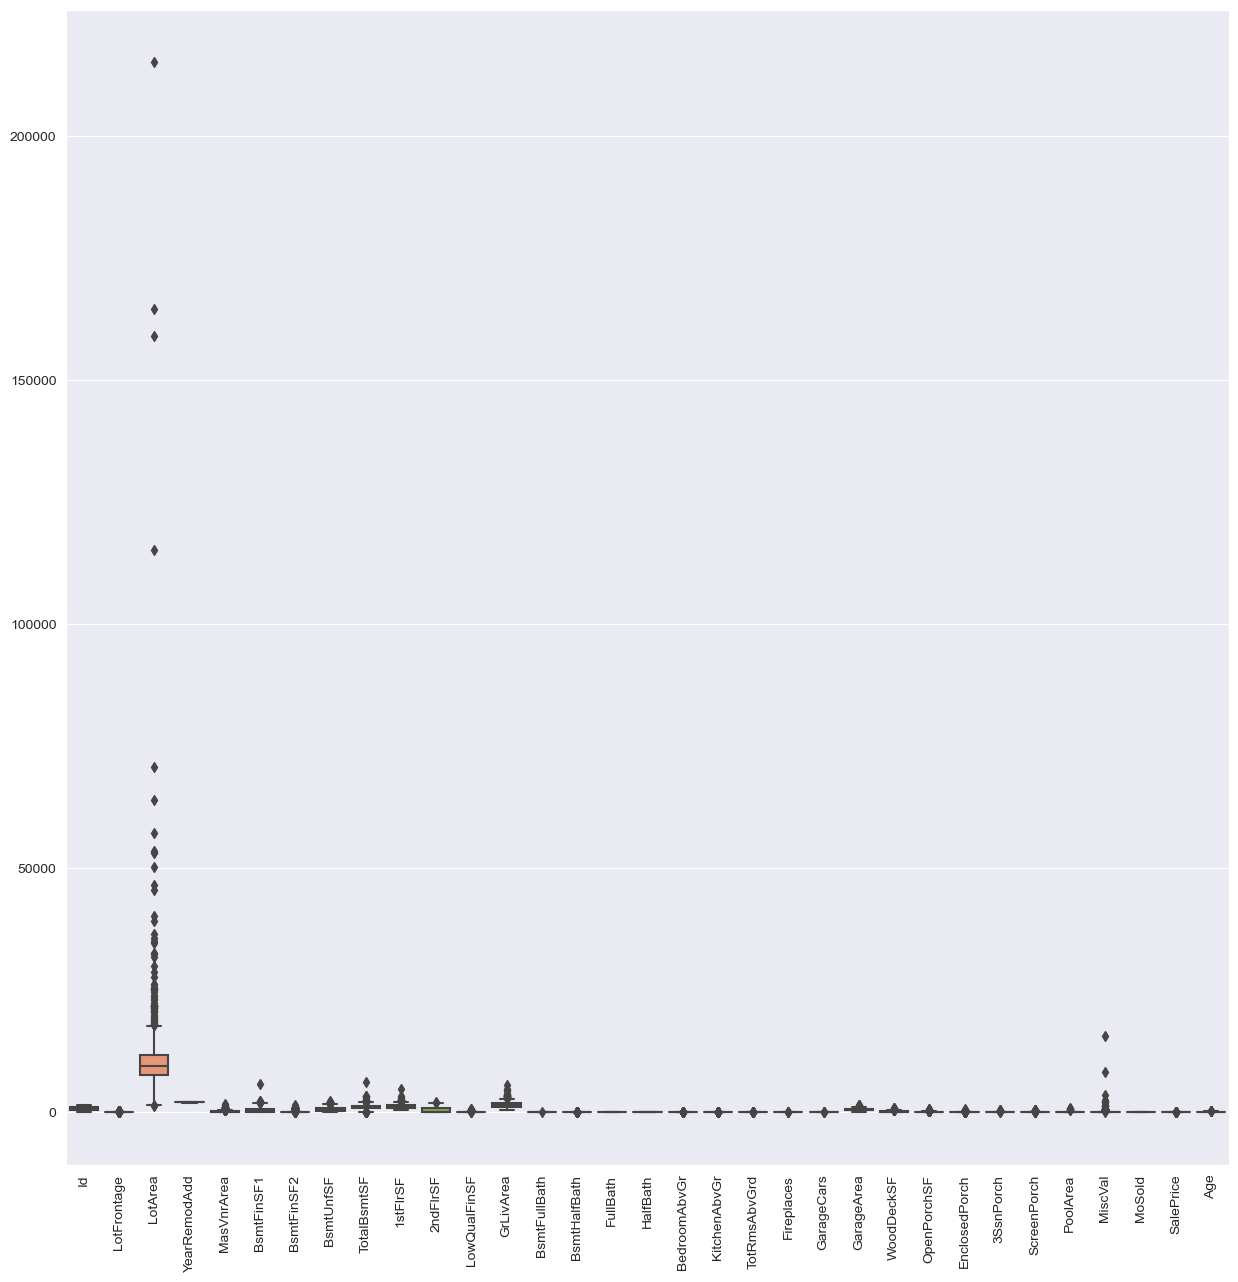

In [44]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [45]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

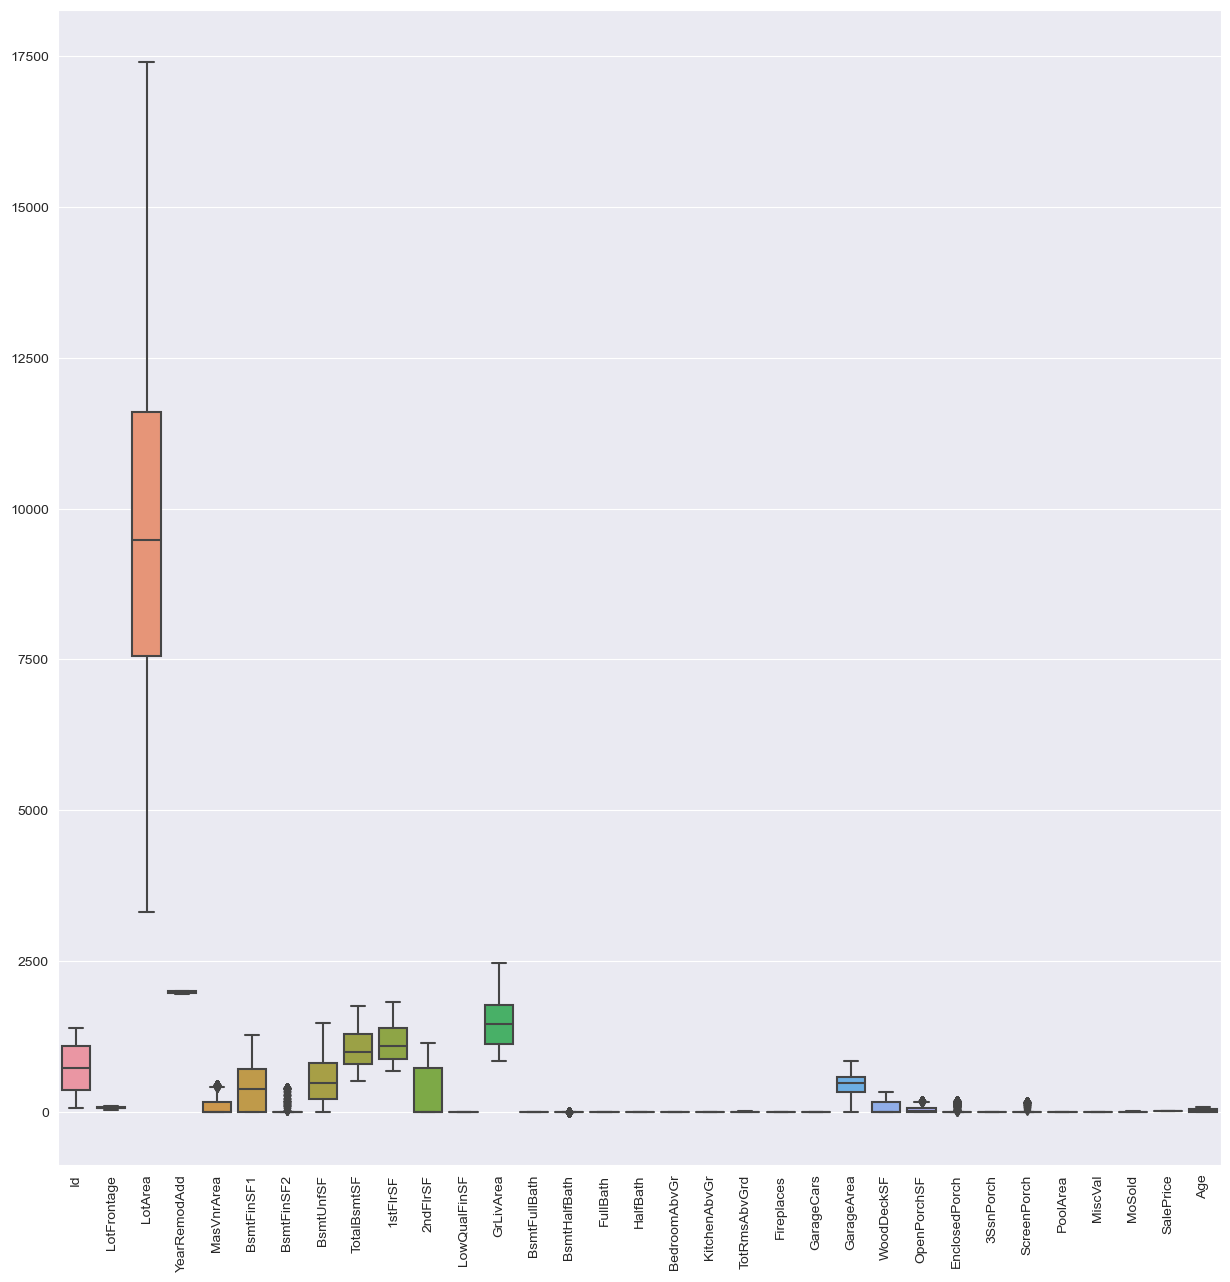

In [46]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [47]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,73.95,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,...,False,False,False,False,True,False,False,False,True,False
1,73.95,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,...,False,False,False,False,True,False,False,False,True,False
2,73.95,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,...,False,False,False,False,True,False,False,False,True,False
3,73.95,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,...,False,False,False,False,True,False,False,False,False,False
4,73.95,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,...,False,False,False,False,True,False,False,False,True,False


## Model Building, Tuning and Evaluation

In [48]:
## X contains all independent variables use to make predictions except 'Id' (not useful) and 'SalePrice' (target variable)
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,854.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,866.0,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,756.0,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,1053.0,...,False,False,False,False,True,False,False,False,True,False


In [49]:
## Separate out the target variable as y which we want to predict
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [50]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [51]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [52]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model 1: Ridge Regression

In [53]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [54]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [56]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)
# Fit the model on training data
ridge.fit(X_train, y_train)
Ridge(alpha=10)
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

In [57]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


## Lasso

In [58]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [60]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [61]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [62]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [63]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.94,0.92
R2 Score (Test),0.93,0.93
RSS (Train),8.53,11.29
RSS (Test),2.87,2.92
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.09,0.10
RMSE (Test),0.10,0.10


In [64]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [65]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [66]:
## View the betas/coefficients
betas

,Ridge,Lasso
LotFrontage,0.01,0.00
LotArea,0.02,0.02
YearRemodAdd,0.02,0.03
MasVnrArea,-0.00,-0.00
BsmtFinSF1,0.01,0.03
...,...,...
SaleCondition_AdjLand,0.02,0.00
SaleCondition_Alloca,0.06,0.00
SaleCondition_Family,-0.01,-0.00
SaleCondition_Normal,0.03,0.02


In [68]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
MasVnrArea,-0.00,-0.00
BsmtUnfSF,-0.01,-0.00
1stFlrSF,0.01,-0.00
LowQualFinSF,0.00,0.00
BsmtHalfBath,-0.00,0.00
...,...,...
SaleType_Oth,0.02,0.00
SaleType_WD,-0.00,-0.00
SaleCondition_AdjLand,0.02,0.00
SaleCondition_Alloca,0.06,0.00


In [69]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(306, 2)

In [70]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.00
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF1               0.03
BsmtFinSF2               0.00
                         ... 
GarageType_Attchd        0.02
GarageYrBlt_2009         0.00
GarageFinish_Unf        -0.01
SaleCondition_Normal     0.02
SaleCondition_Partial    0.02
Name: Lasso, Length: 78, dtype: float64

In [72]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.09
OverallQual_9          0.08
OverallQual_8          0.08
Neighborhood_Crawfor   0.08
OverallCond_9          0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
SaleCondition_Alloca   0.06
CentralAir_Y           0.05
TotalBsmtSF            0.05
Name: Ridge, dtype: float64

In [74]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
SaleCondition_Alloca   1.07
CentralAir_Y           1.06
TotalBsmtSF            1.05
Name: Ridge, dtype: float64

In [75]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64

In [76]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.13
GrLivArea              1.11
OverallQual_8          1.11
Neighborhood_Crawfor   1.09
Exterior1st_BrkFace    1.08
Functional_Typ         1.08
CentralAir_Y           1.05
Neighborhood_Somerst   1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Name: Lasso, dtype: float64

In [77]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [78]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 9.37
RSS (Test) = 2.82
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [79]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [80]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 13.49
RSS (Test) = 3.45
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [81]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.93,0.91
R2 Score (Test),0.93,0.91
RSS (Train),9.37,13.49
RSS (Test),2.82,3.45
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.09,0.11
RMSE (Test),0.10,0.11


In [82]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [83]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
## View the betas/coefficients
betas 

,Ridge,Lasso
LotFrontage,0.01,0.00
LotArea,0.02,0.02
YearRemodAdd,0.03,0.04
MasVnrArea,-0.00,-0.00
BsmtFinSF1,0.02,0.03
...,...,...
SaleCondition_AdjLand,0.01,0.00
SaleCondition_Alloca,0.04,0.00
SaleCondition_Family,-0.01,-0.00
SaleCondition_Normal,0.03,0.00


In [84]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.08
OverallQual_8          0.07
OverallQual_9          0.06
Neighborhood_Crawfor   0.06
Functional_Typ         0.06
Exterior1st_BrkFace    0.06
OverallCond_9          0.05
TotalBsmtSF            0.05
CentralAir_Y           0.05
OverallCond_7          0.04
Name: Ridge, dtype: float64

In [85]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.08
OverallQual_8          1.07
OverallQual_9          1.07
Neighborhood_Crawfor   1.07
Functional_Typ         1.06
Exterior1st_BrkFace    1.06
OverallCond_9          1.06
TotalBsmtSF            1.05
CentralAir_Y           1.05
OverallCond_7          1.04
Name: Ridge, dtype: float64

In [86]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.11
OverallQual_8          0.08
OverallQual_9          0.08
Functional_Typ         0.07
Neighborhood_Crawfor   0.07
TotalBsmtSF            0.05
Exterior1st_BrkFace    0.04
CentralAir_Y           0.04
YearRemodAdd           0.04
Condition1_Norm        0.03
Name: Lasso, dtype: float64

In [87]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
OverallQual_8          1.09
OverallQual_9          1.08
Functional_Typ         1.07
Neighborhood_Crawfor   1.07
TotalBsmtSF            1.05
Exterior1st_BrkFace    1.05
CentralAir_Y           1.04
YearRemodAdd           1.04
Condition1_Norm        1.03
Name: Lasso, dtype: float64

In [88]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']

In [89]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [90]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [92]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [93]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [94]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 12.75
RSS (Test) = 3.02
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [95]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.91
R2 Score (Test),0.92
RSS (Train),12.75
RSS (Test),3.02
MSE (Train),0.01
MSE (Test),0.01
RMSE (Train),0.10
RMSE (Test),0.10


In [96]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [97]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
# betas['Lasso'] = lasso.coef_
## View the betas/coefficients
betas 


,Lasso
LotFrontage,0.00
LotArea,0.02
YearRemodAdd,0.03
MasVnrArea,-0.00
BsmtFinSF1,0.03
...,...
SaleCondition_AdjLand,0.00
SaleCondition_Alloca,0.00
SaleCondition_Family,-0.00
SaleCondition_Normal,0.02


In [98]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.10
Functional_Typ         0.07
1stFlrSF               0.07
MSSubClass_70          0.06
Neighborhood_Somerst   0.06
Name: Lasso, dtype: float64